<a href="https://colab.research.google.com/github/jsgf04/TdR_Physics_behind_skiing/blob/main/Gr%C3%A0fiques%20de%20tots%20els%20models%20de%20p%C3%A8ndols.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Gràfiques del pèndol centrífug invertit [Nivell: principiant-intermedi]**



Variables que et demanarà:


*   **Alçada de l'esquiador (m) per calcular la posició aproximada del CM (centre de massa)**
*   **Radi dels esquís (m)**
*   **Velocitat de l'esquiador durant el trajecte (m/s)(constant)**
*   **Temps final o durada del trajecte (s)**
*   **Angle inicial del pèndol/de l'esquiador (º):** 

Hi ha **dos** casos:

- Quan l'esquiador/el pèndol té 3 posicions d'equilibri. Dues de simètriques (t'ho indica abans que intodueixis l'angle) i una de vertical (0º). Òbviament, si aquest límit és sobrepassat l'esquiador perd l'equilibi i cau (en el cas del pèndol actua estranyament). Per això, diem que l'inclinació del pèndol/de l'esquiador no pot passar del límit o angle màxim (99% de l'angle d'equilibri).

- Quan l'esquiador/el pèndol té una posició d'equilibri que és la vertical (0º) i, a més a més, si tries qualsevol angle, mentre sigui realista o no sigui extrem, pot estar oscil·lant constantment sense quedar-se en cap posició d'equilibri.

**(*) Posició d'equilibri significa la posició de l'esquiador en què $\Omega=0$.**



---
Normes per al correcte funcionament del simulador:

-Nombres decimals amb '  .  ' , no amb '  ,  '  .

**Correcte :** 12.7

**Incorrecte :** 12,7


---
Per iniciar la simulació cliqueu el botó de "play" al racó superior esquerre del codi o bé feu la combinació de botons 

```
Ctrl+Enter
```




ADVERTÈNCIA: EL SIMULADOR ÉS VÀLID FINS APROXIMADAMENT 65º-70º
Alçada de l'esquiador (m): 1.8
Radi dels esquís (m): 14
Velocitat de l'esquiador durant el trajecte (m/s): 12
Temps final o duració del trajecte (s): 10
No hi ha posicions d'equilibri; és a dir, el pèndol/l'esquiador oscilarà constantment a qualsevol angle sempre i quan no sigui extrem (70º-90º, 90º seria inclinar-se paral·lelament amb el terra | A partir de 70º l'esquiador pateix fins a 3 g s de força en cas el cas que la pista sigui horitzontal, això requereix molta força muscular.)
Angle inicial del pèndol/esquiador respecte de la vertical (º): 45


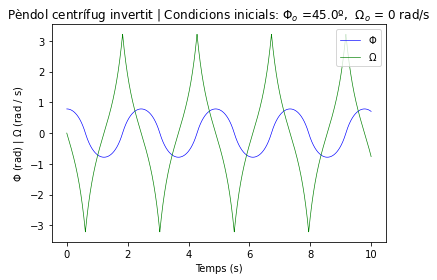

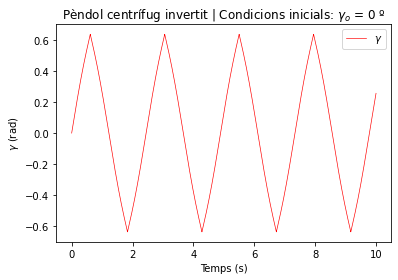

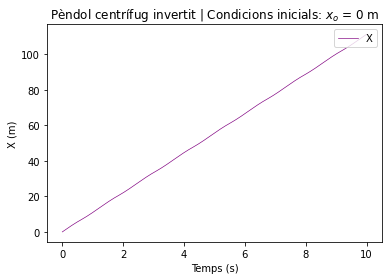

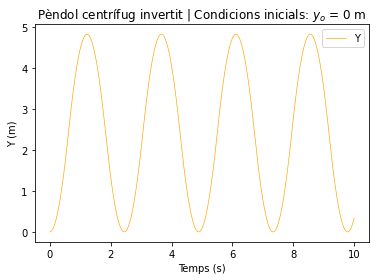

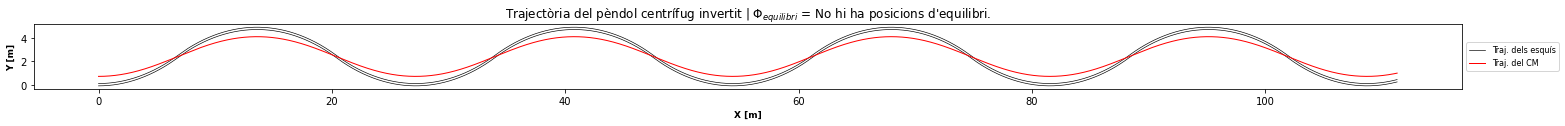

In [ ]:
import numpy as np
from numpy import sin,cos,sign,sqrt,arcsin,pi
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
from termcolor import colored
from matplotlib.pyplot import figure
import sympy as smp

print(colored("ADVERTÈNCIA: EL SIMULADOR ÉS VÀLID FINS APROXIMADAMENT 65º-70º","red"))
g = 9.807
height = float(input("Alçada de l'esquiador (m): "))
l = 0.56*height
R_sc = float(input("Radi dels esquís (m): "))
V = float(input("Velocitat de l'esquiador durant el trajecte (m/s): "))

if V**2/(g*R_sc)<1:
  Phi_eq = round(np.arcsin(V**2/(g*R_sc))*(180/np.pi), 3)
else:
  Phi_eq = "No hi ha posicions d'equilibri"

if V**2/(g*R_sc)<1:
  text2 = "${\Phi}_{equilibri}$ = ±"
else:
  text2 = "${\Phi}_{equilibri}$ = "

def equations(t,y):
    dy=np.zeros([2])
    dy[0] = y[1]
    dy[1] = (g/l)*np.sin(y[0])-(V**2/(l*R_sc))*np.sign(y[0])

    return dy

final_time = float(input("Temps final o duració del trajecte (s): "))
time = np.linspace(0, final_time, 100000)

if V**2/(g*R_sc)<1:
  Phi_equilibri_arr = round(0.98*Phi_eq,3)
  print("Angle d'equilibri per referència: ±"+str(Phi_eq)+"º",  colored(("[NO POT PASSAR DE ± 0.99 · \u03A6  ≈ ± "+str(Phi_equilibri_arr)+"... º]"),"red"))
else:
  print("No hi ha posicions d'equilibri; és a dir, el pèndol/l'esquiador oscilarà constantment a qualsevol angle sempre i quan no sigui extrem (70º-90º, 90º seria inclinar-se paral·lelament amb el terra | A partir de 70º l'esquiador pateix fins a 3 g s de força en cas el cas que la pista sigui horitzontal, això requereix molta força muscular.)")

initial_Psi = float(input("Angle inicial del pèndol/esquiador respecte de la vertical (º): "))
y0 = [np.radians(initial_Psi), np.radians(0.0)]

res = solve_ivp(equations, (0,final_time), y0, method='RK45', t_eval=time, dense_output=True, rtol=1e-8, atol=1e-10)

t, psi, omega = res.t, res.y[0], res.y[1]

dense1 = res.sol
def dgamma(t, gamma):
    Psi, Omega = dense1(t)

    return [(V*np.sign(Psi))/(R_sc*np.cos(Psi))]

initial_gamma = [np.radians(0.0)]

gamma_res = solve_ivp(dgamma, (0,final_time), initial_gamma, method="RK45", t_eval = time, dense_output=True, rtol=1e-8, atol=1e-10)
gamma_times, gammas = gamma_res.t, gamma_res.y

dense2 = gamma_res.sol
def dx(t, x):
    Gamma = dense2(t)

    return [V*np.cos(Gamma)]

initial_x = [0.0]

x_res = solve_ivp(dx, (0,final_time), initial_x, method="RK45", t_eval = time, dense_output=True, rtol=1e-8, atol=1e-10)
x_times, x_skis = x_res.t, x_res.y

def dy(t, y):
    Gamma = dense2(t)

    return [V*np.sin(Gamma)]

initial_y = [0.0]

y_res = solve_ivp(dy, (0,final_time), initial_y, method="RK45", t_eval = time, dense_output=True, rtol=1e-8, atol=1e-10)
y_times, y_skis = y_res.t, y_res.y[0]

plt.plot(t.T, psi.T,"b",linewidth = 0.65, label = "${\Phi}$")
plt.plot(t.T, omega.T,"g",linewidth = 0.65, label = "${\Omega}$")
s = 'Condicions inicials: ${\Phi}_{o}$ ='+str(initial_Psi)+'º,  ${\Omega}_{o}$ = 0 rad/s'
plt.title('Pèndol centrífug invertit | '+ s)
plt.xlabel('Temps (s)')
plt.ylabel(u'${\Phi}$ (rad) | ${\Omega}$ (rad / s)')
plt.grid(False)
plt.legend(loc = "upper right")
plt.show()
plt.plot(gamma_times, gammas.T,"r",linewidth = 0.65, label = "${\gamma}$")
s = 'Condicions inicials: ${\gamma}_{o}$ = 0 º'
plt.title('Pèndol centrífug invertit | '+ s)
plt.xlabel('Temps (s)')
plt.ylabel(u'${\gamma}$ (rad)')
plt.grid(False)
plt.legend(loc = "upper right")
plt.axis()
plt.show()
plt.plot(x_times.T, x_skis.T,color = "purple",linewidth = 0.65, label = "X")
s = 'Condicions inicials: $x_{o}$ = 0 m'
plt.title('Pèndol centrífug invertit | '+ s)
plt.xlabel('Temps (s)')
plt.ylabel('X (m)')
plt.grid(False)
plt.legend(loc = "upper right")
plt.axis()
plt.show()
plt.plot(y_times.T, y_skis.T,color="orange",linewidth = 0.65, label = "Y")
s = 'Condicions inicials: $y_{o}$ = 0 m'
plt.title('Pèndol centrífug invertit | '+ s)
plt.xlabel('Temps (s)')
plt.ylabel('Y (m)')
plt.grid(False)
plt.legend(loc = "upper right")
plt.axis()
plt.show()

if V**2/(g*R_sc)<1:
  text1 = '... º, ${\Phi}_{màx}$ = 0.99 · ${\Phi}_{equilibri}$'
else:
  text1 = "."

x_anim = []
y3_anim = []

plt.figure(figsize=(6.4*4,4.8*4))
plt.plot(x_skis.T, y_skis.T-0.1,color="black",linewidth = 0.65, label="Traj. dels esquís")
plt.plot(x_skis.T, y_skis.T+0.1,color="black",linewidth = 0.65)

for i in range (len(psi)):
  x_anim.append(x_skis.T[i])
  CM_Y = l*np.sin(psi[i])
  y3_anim.append(y_skis.T[i]+CM_Y)

plt.plot(x_anim, y3_anim,"r", linewidth=1, label = "Traj. del CM")
plt.title('Trajectòria del pèndol centrífug invertit | '+text2+str(Phi_eq)+text1)
plt.xlabel('X [m]',fontsize=9, fontweight = "bold")
plt.ylabel('Y [m]',fontsize=9, fontweight = "bold")
plt.legend(loc='center left',fontsize=8, bbox_to_anchor=(1, 0.5))
plt.axis("scaled")
plt.show()

#**Gràfiques del pèndol centrífug invertit amb flexió i extensió de cames [Nivell: experimentat]**



Variables que et demanarà:

*   **Alçada de l'esquiador (m):** per calcular la posició aproximada del CM (centre de massa)
*   **Radi dels esquís (m)**
*   **Velocitat de l'esquiador durant el trajecte (m/s)(constant)**
*   **Temps final o durada del trajecte (s)**
*   **Angle inicial del pèndol/de l'esquiador (º):** 

Hi ha **dos** casos:

- Quan l'esquiador/el pèndol té 3 posicions d'equilibri. Dues de simètriques (t'ho indica abans que intodueixis l'angle) i una de vertical (0º). Òbviament, si aquest límit és sobrepassat l'esquiador perd l'equilibi i cau (en el cas del pèndol actua estranyament). Per això, diem que l'inclinació del pèndol/de l'esquiador no pot passar del límit o angle màxim (99% de l'angle d'equilibri).

- Quan l'esquiador/el pèndol té una posició d'equilibri que és la vertical (0º) i, a més a més, si tries qualsevol angle, mentre sigui realista o no sigui extrem, pot estar oscil·lant constantment sense quedar-se en cap posició d'equilibri.

**(*) Posició d'equilibri significa la posició de l'esquiador en què $\Omega=0$.**


*   **Percentatge de flexió i extensió de les cames ($\eta$):** quan l'esquiador està en posició vertical les cames estan flexionades, per altra banda, si està al extrem de la curva la cama exterior està extesa (l'altra és paral·lela a l'exterior i, per tant, sempre està flexionada, vertical o no vertical). Generalment, com més petit és el percentatge, menys es nota la flexió i extensió de cames, i, a l'inrevés, com més s'aproxima al 100% més es nota la flexió i extensió de cames.



---
Normes per al correcte funcionament del simulador:

-Nombres decimals amb '  .  ' , no amb '  ,  '  .

**Correcte :** 12.7

**Incorrecte :** 12,7


---
Per iniciar la simulació cliqueu el botó de "play" al racó superior esquerre del codi o bé feu la combinació de tecles

```
Ctrl+Enter
```




ADVERTÈNCIA: EL SIMULADOR ÉS VÀLID FINS APROXIMADAMENT 65º-70º
Alçada de l'esquiador (m): 1.8
Radi dels esquís (m): 14
Velocitat de l'esquiador durant el trajecte (m/s): 12
Temps final o duració del trajecte (s): 10
No hi ha posicions d'equilibri; és a dir, el pèndol/l'esquiador oscilarà constantment a qualsevol angle sempre i quan no sigui extrem (70º-90º, 90º seria inclinar-se paral·lelament amb el terra | A partir de 70º l'esquiador pateix fins a 3 g s de força en cas el cas que la pista sigui horitzontal, això requereix molta força muscular.)
Angle inicial del pèndol/esquiador respecte de la vertical (º): 45
Percentatge de flexió i extensió de les cames (0-100%): 80


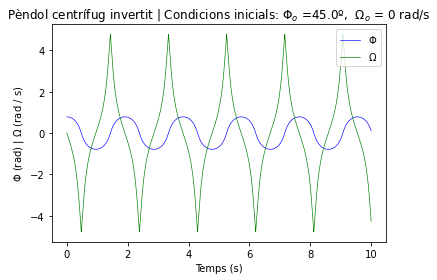

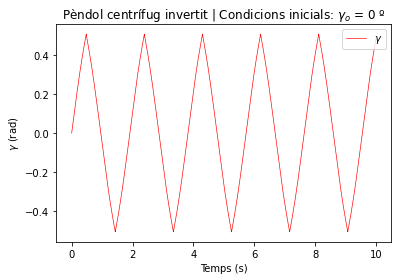

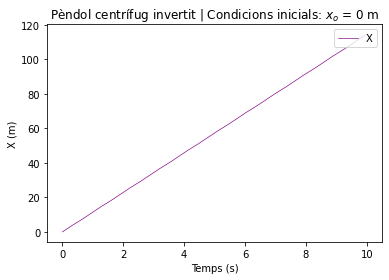

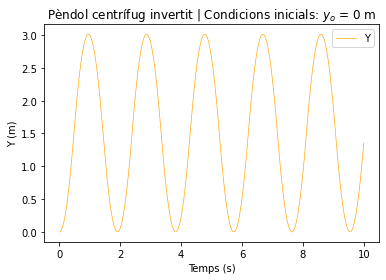

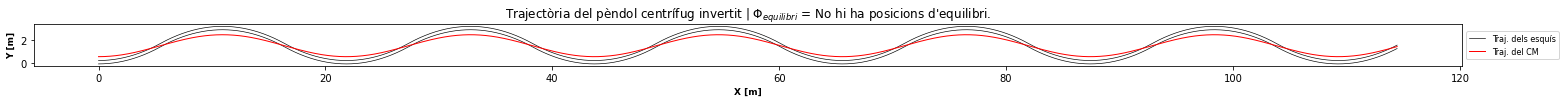

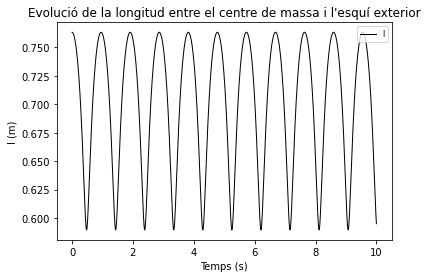

In [ ]:
import numpy as np
from numpy import sin,cos,sign,sqrt,arcsin,pi
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
from termcolor import colored
from matplotlib.pyplot import figure
import sympy as smp

print(colored("ADVERTÈNCIA: EL SIMULADOR ÉS VÀLID FINS APROXIMADAMENT 65º-70º","red"))
g = 9.807
height = float(input("Alçada de l'esquiador (m): "))
l_o = 0.56*height
R_sc = float(input("Radi dels esquís (m): "))
V = float(input("Velocitat de l'esquiador durant el trajecte (m/s): "))

if V**2/(g*R_sc)<1:
  Phi_eq = round(np.arcsin(V**2/(g*R_sc))*(180/np.pi), 3)
else:
  Phi_eq = "No hi ha posicions d'equilibri"

if V**2/(g*R_sc)<1:
  text2 = "${\Phi}_{equilibri}$ = ±"
else:
  text2 = "${\Phi}_{equilibri}$ = "

def equations(t,y):
    dy=np.zeros([2])
    dy[0] = y[1]
    dy[1] = (g/(l_o*(1-b*np.cos(y[0]))**(1./3)))*np.sin(y[0])-((V**2)/(R_sc*l_o*(1-b*np.cos(y[0]))**(1./3)))*np.sign(y[0]) - (2 * b * (y[1])**2 * np.sin(y[0]))/(3-3 * b * np.cos(y[0]))

    return dy

final_time = float(input("Temps final o duració del trajecte (s): "))
time = np.linspace(0, final_time, 100000)

if V**2/(g*R_sc)<1:
  Phi_equilibri_arr = round(0.98*Phi_eq,3)
  print("Angle d'equilibri per referència: ±"+str(Phi_eq)+"º",  colored(("[NO POT PASSAR DE ± 0.99 · \u03A6  ≈ ± "+str(Phi_equilibri_arr)+"... º]"),"red"))
else:
  print("No hi ha posicions d'equilibri; és a dir, el pèndol/l'esquiador oscilarà constantment a qualsevol angle sempre i quan no sigui extrem (70º-90º, 90º seria inclinar-se paral·lelament amb el terra | A partir de 70º l'esquiador pateix fins a 3 g s de força en cas el cas que la pista sigui horitzontal, això requereix molta força muscular.)")

initial_Psi = float(input("Angle inicial del pèndol/esquiador respecte de la vertical (º): "))
P = float(input("Percentatge de flexió i extensió de les cames (0-100%): "))
b = P/100
y0 = [np.radians(initial_Psi), np.radians(0.0)]

res = solve_ivp(equations, (0,final_time), y0, method='RK45', t_eval=time, dense_output=True, rtol=1e-8, atol=1e-10)

t, psi, omega = res.t, res.y[0], res.y[1]

dense1 = res.sol
def dgamma(t, gamma):
    Psi, Omega = dense1(t)

    return [(V*np.sign(Psi))/(R_sc*np.cos(Psi))]

initial_gamma = [np.radians(0.0)]

gamma_res = solve_ivp(dgamma, (0,final_time), initial_gamma, method="RK45", t_eval = time, dense_output=True, rtol=1e-8, atol=1e-10)
gamma_times, gammas = gamma_res.t, gamma_res.y

dense2 = gamma_res.sol
def dx(t, x):
    Gamma = dense2(t)

    return [V*np.cos(Gamma)]

initial_x = [0.0]

x_res = solve_ivp(dx, (0,final_time), initial_x, method="RK45", t_eval = time, dense_output=True, rtol=1e-8, atol=1e-10)
x_times, x_skis = x_res.t, x_res.y

def dy(t, y):
    Gamma = dense2(t)

    return [V*np.sin(Gamma)]

initial_y = [0.0]

y_res = solve_ivp(dy, (0,final_time), initial_y, method="RK45", t_eval = time, dense_output=True, rtol=1e-8, atol=1e-10)
y_times, y_skis = y_res.t, y_res.y[0]

plt.plot(t.T, psi.T,"b",linewidth = 0.65, label = "${\Phi}$")
plt.plot(t.T, omega.T,"g",linewidth = 0.65, label = "${\Omega}$")
s = 'Condicions inicials: ${\Phi}_{o}$ ='+str(initial_Psi)+'º,  ${\Omega}_{o}$ = 0 rad/s'
plt.title('Pèndol centrífug invertit | '+ s)
plt.xlabel('Temps (s)')
plt.ylabel(u'${\Phi}$ (rad) | ${\Omega}$ (rad / s)')
plt.grid(False)
plt.legend(loc = "upper right")
plt.show()
plt.plot(gamma_times, gammas.T,"r",linewidth = 0.65, label = "${\gamma}$")
s = 'Condicions inicials: ${\gamma}_{o}$ = 0 º'
plt.title('Pèndol centrífug invertit | '+ s)
plt.xlabel('Temps (s)')
plt.ylabel(u'${\gamma}$ (rad)')
plt.grid(False)
plt.legend(loc = "upper right")
plt.axis()
plt.show()
plt.plot(x_times.T, x_skis.T,color = "purple",linewidth = 0.65, label = "X")
s = 'Condicions inicials: $x_{o}$ = 0 m'
plt.title('Pèndol centrífug invertit | '+ s)
plt.xlabel('Temps (s)')
plt.ylabel('X (m)')
plt.grid(False)
plt.legend(loc = "upper right")
plt.axis()
plt.show()
plt.plot(y_times.T, y_skis.T,color="orange",linewidth = 0.65, label = "Y")
s = 'Condicions inicials: $y_{o}$ = 0 m'
plt.title('Pèndol centrífug invertit | '+ s)
plt.xlabel('Temps (s)')
plt.ylabel('Y (m)')
plt.grid(False)
plt.legend(loc = "upper right")
plt.axis()
plt.show()

if V**2/(g*R_sc)<1:
  text1 = '... º, ${\Phi}_{màx}$ = 0.99 · ${\Phi}_{equilibri}$'
else:
  text1 = "."

plt.figure(figsize=(6.4*4,4.8*4))
plt.plot(x_skis.T, y_skis.T-0.1,color="black",linewidth = 0.65, label="Traj. dels esquís")
plt.plot(x_skis.T, y_skis.T+0.2,color="black",linewidth = 0.65)

x_anim = []
y3_anim = []

for i in range (len(psi)):
  x_anim.append(x_skis.T[i])
  CM_Y = l_o * (1-b * np.cos(psi[i]))**(1./3) * np.sin(psi[i])
  y3_anim.append(y_skis.T[i]+CM_Y)

plt.plot(x_anim, y3_anim,"r", linewidth=1, label = "Traj. del CM")
plt.title('Trajectòria del pèndol centrífug invertit | '+text2+str(Phi_eq)+text1)
plt.xlabel('X [m]',fontsize=9, fontweight = "bold")
plt.ylabel('Y [m]',fontsize=9, fontweight = "bold")
plt.legend(loc='center left',fontsize=8, bbox_to_anchor=(1, 0.5))
plt.axis("scaled")
plt.show()

l = l_o * (1-b * np.cos(psi))**(1./3)
plt.plot(t.T, l.T,"k", linewidth=1, label ="l")
plt.title("Evolució de la longitud entre el centre de massa i l'esquí exterior")
plt.xlabel('Temps (s)')
plt.ylabel('l (m)')
plt.legend(loc="upper right", fontsize=8)
plt.show()

#**Gràfiques del pèndol centrífug invertit amb angulació [Nivell:expert]**



Variables que et demanarà:

*   **Alçada de l'esquiador (m):** per calcular la posició aproximada del CM (centre de massa)
*   **Radi dels esquís (m)**
*  **Velocitat de l'esquiador durant el trajecte (m/s)(constant)**
*   **Temps final o durada del trajecte (s)**
*  **Angle inicial del pèndol/de l'esquiador (º):**

Hi ha **dos** casos:

- Quan l'esquiador/el pèndol té 3 posicions d'equilibri. Dues de simètriques (t'ho indica abans que intodueixis l'angle) i una de vertical (0º). Òbviament, si aquest límit és sobrepassat l'esquiador perd l'equilibi i cau (en el cas del pèndol actua estranyament). Per això, diem que l'inclinació del pèndol/de l'esquiador no pot passar del límit o angle màxim (99% de l'angle d'equilibri).

- Quan l'esquiador/el pèndol té una posició d'equilibri que és la vertical (0º) i, a més a més, si tries qualsevol angle, mentre sigui realista o no sigui extrem, pot estar oscil·lant constantment sense quedar-se en cap posició d'equilibri.

**(*) Posició d'equilibri significa la posició de l'esquiador en què $\Omega=0$.**



* **Percentatge d'angulació ($\xi$):** l'angle de l'esquí sempre serà més gran que la de l'esquiador. Està comprès entre 0-100%. A 100% no hi ha angulació, atès que és com si multipliquessis per 1.

---
Normes per al correcte funcionament del simulador:

-Nombres decimals amb '  .  ' , no amb '  ,  '  .

**Correcte :** 12.7

**Incorrecte :** 12,7


---
Per iniciar la simulació cliqueu el botó de "play" al racó superior esquerre del codi o bé feu la combinació de tecles 

```
Ctrl+Enter
```

ADVERTÈNCIA: EL SIMULADOR ÉS VÀLID FINS APROXIMADAMENT 65º-70º
Alçada de l'esquiador (m): 1.8
Radi dels esquís (m): 14
Velocitat de l'esquiador durant el trajecte (m/s): 12
Percentatge d'angulació: 75
Temps final o duració del trajecte (s): 10
No hi ha posicions d'equilibri; és a dir, el pèndol/l'esquiador oscilarà constantment a qualsevol angle sempre i quan no sigui extrem (70º-90º, 90º seria inclinar-se paral·lelament amb el terra | A partir de 70º l'esquiador pateix fins a 3 g s de força en cas el cas que la pista sigui horitzontal, això requereix molta força muscular.)
Tot i així no l'angle dels esquís no pot sobrepassar els 90º, pel que Φ₀≤ 67.5º
Angle inicial del pèndol/esquiador respecte de la vertical (º): 45


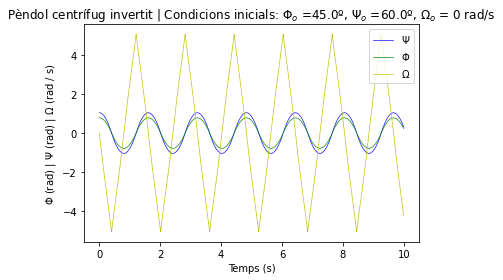

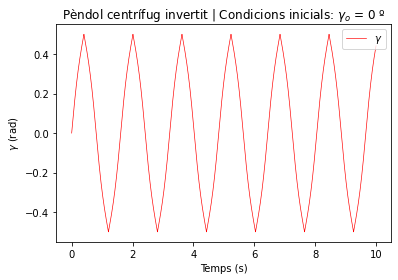

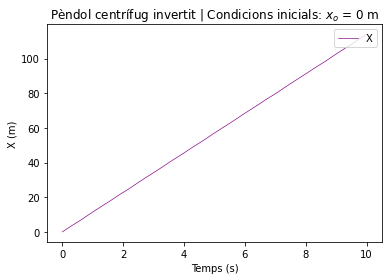

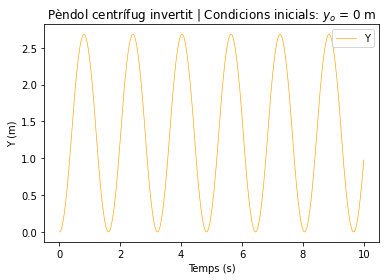

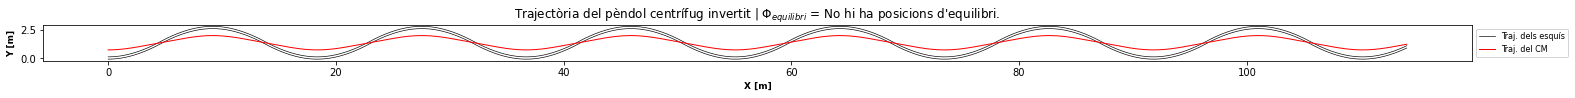

In [ ]:
import numpy as np
from numpy import sin,cos,sign,sqrt,arcsin,pi
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
from termcolor import colored
from matplotlib.pyplot import figure
import sympy as smp
from scipy.optimize import fsolve

class RootFinder:
    def __init__(self, start, stop, step=0.01, root_dtype="float64", xtol=1e-9):

        self.start = start
        self.stop = stop
        self.step = step
        self.xtol = xtol
        self.roots = np.array([], dtype=root_dtype)

    def add_to_roots(self, x):

        if (x < self.start) or (x > self.stop):
            return  # outside range
        if any(abs(self.roots - x) < self.xtol):
            return  # root already found.

        self.roots = np.append(self.roots, x)

    def find(self, f, *args):
        current = self.start

        for x0 in np.arange(self.start, self.stop + self.step, self.step):
            if x0 < current:
                continue
            x = self.find_root1(f, x0, *args)
            if x is None:  # no root found.
                continue
            current = x
            self.add_to_roots(x)

        return self.roots

    def find_root1(self, f, x0, *args):

        x, _, ier, _ = fsolve(f, x0=x0, args=args, full_output=True, xtol=self.xtol)
        if ier == 1:
            return x[0]
        return None

print(colored("ADVERTÈNCIA: EL SIMULADOR ÉS VÀLID FINS APROXIMADAMENT 65º-70º","red"))
g = 9.807
height = float(input("Alçada de l'esquiador (m): "))
l = 0.56*height
R_sc = float(input("Radi dels esquís (m): "))
V = float(input("Velocitat de l'esquiador durant el trajecte (m/s): "))
zeta = V**2/(g * R_sc)
P = float(input("Percentatge d'angulació: "))
A = P/100

def f(x):
  return np.sin(x)-zeta*(np.cos(x)/np.cos(x/A))

r = RootFinder(0, np.pi/2, 0.0001)
phi_eq = r.find(f)

if phi_eq.size>0:
  Phi_eq = round(phi_eq[0]*(180/np.pi), 3)
else:
  Phi_eq = "No hi ha posicions d'equilibri"

if phi_eq.size>0:
  text2 = "${\Phi}_{equilibri}$ = ±"
else:
  text2 = "${\Phi}_{equilibri}$ = "

def equations(t,y):
    dy=np.zeros([2])
    dy[0] = y[1]
    dy[1] = (g/l*A)*np.sin(A*y[0])-(V**2 * np.cos(A*y[0]) * np.sign(y[0]))/(l*R_sc*A*np.cos(y[0]))

    return dy

final_time = float(input("Temps final o duració del trajecte (s): "))
time = np.linspace(0, final_time, 100000)

if phi_eq.size>0:
  Phi_equilibri_arr = round(0.98*Phi_eq,3)
  print("Angle d'equilibri per referència: ±"+str(Phi_eq)+"º",  colored(("[NO POT PASSAR DE ± 0.99 · \u03A6  ≈ ± "+str(Phi_equilibri_arr)+"... º]"),"red"))
else:
  print("No hi ha posicions d'equilibri; és a dir, el pèndol/l'esquiador oscilarà constantment a qualsevol angle sempre i quan no sigui extrem (70º-90º, 90º seria inclinar-se paral·lelament amb el terra | A partir de 70º l'esquiador pateix fins a 3 g s de força en cas el cas que la pista sigui horitzontal, això requereix molta força muscular.)")
  print("Tot i així no l'angle dels esquís no pot sobrepassar els 90º, pel que \N{GREEK CAPITAL LETTER PHI}\N{SUBSCRIPT ZERO}≤ "+str(round(90*A,2))+"º")

initial_Phi = float(input("Angle inicial del pèndol/esquiador respecte de la vertical (º): "))
y0 = [np.radians(initial_Phi/A), np.radians(0.0)]

res = solve_ivp(equations, (0,final_time), y0, method='RK45', t_eval=time, dense_output=True, rtol=1e-8, atol=1e-10)

t, psi, omega = res.t, res.y[0], res.y[1]

dense1 = res.sol
def dgamma(t, gamma):
    Psi, Omega = dense1(t)

    return [(V*np.sign(Psi))/(R_sc*np.cos(Psi))]

initial_gamma = [np.radians(0.0)]

gamma_res = solve_ivp(dgamma, (0,final_time), initial_gamma, method="RK45", t_eval = time, dense_output=True, rtol=1e-8, atol=1e-10)
gamma_times, gammas = gamma_res.t, gamma_res.y

dense2 = gamma_res.sol
def dx(t, x):
    Gamma = dense2(t)

    return [V*np.cos(Gamma)]

initial_x = [0.0]

x_res = solve_ivp(dx, (0,final_time), initial_x, method="RK45", t_eval = time, dense_output=True, rtol=1e-8, atol=1e-10)
x_times, x_skis = x_res.t, x_res.y

def dy(t, y):
    Gamma = dense2(t)

    return [V*np.sin(Gamma)]

initial_y = [0.0]

y_res = solve_ivp(dy, (0,final_time), initial_y, method="RK45", t_eval = time, dense_output=True, rtol=1e-8, atol=1e-10)
y_times, y_skis = y_res.t, y_res.y[0]

plt.plot(t.T, psi.T,"b",linewidth = 0.65, label = "${\Psi}$")
plt.plot(t.T, A*psi.T,"g",linewidth = 0.65, label = "${\Phi}$")
plt.plot(t.T, omega.T,"y",linewidth = 0.65, label = "${\Omega}$")
s = 'Condicions inicials: ${\Phi}_{o}$ ='+str(initial_Phi)+'º, ${\Psi}_{o}$ ='+str(round(initial_Phi/A, 1))+'º, ${\Omega}_{o}$ = 0 rad/s'
plt.title('Pèndol centrífug invertit | '+ s)
plt.xlabel('Temps (s)')
plt.ylabel(u'${\Phi}$ (rad) | ${\Psi}$ (rad) | ${\Omega}$ (rad / s)')
plt.grid(False)
plt.legend(loc = "upper right")
plt.show()
plt.plot(gamma_times, gammas.T,"r",linewidth = 0.65, label = "${\gamma}$")
s = 'Condicions inicials: ${\gamma}_{o}$ = 0 º'
plt.title('Pèndol centrífug invertit | '+ s)
plt.xlabel('Temps (s)')
plt.ylabel(u'${\gamma}$ (rad)')
plt.grid(False)
plt.legend(loc = "upper right")
plt.axis()
plt.show()
plt.plot(x_times.T, x_skis.T,color = "purple",linewidth = 0.65, label = "X")
s = 'Condicions inicials: $x_{o}$ = 0 m'
plt.title('Pèndol centrífug invertit | '+ s)
plt.xlabel('Temps (s)')
plt.ylabel('X (m)')
plt.grid(False)
plt.legend(loc = "upper right")
plt.axis()
plt.show()
plt.plot(y_times.T, y_skis.T,color="orange",linewidth = 0.65, label = "Y")
s = 'Condicions inicials: $y_{o}$ = 0 m'
plt.title('Pèndol centrífug invertit | '+ s)
plt.xlabel('Temps (s)')
plt.ylabel('Y (m)')
plt.grid(False)
plt.legend(loc = "upper right")
plt.axis()
plt.show()

if phi_eq.size>0:
  text1 = '... º, ${\Phi}_{màx}$ = 0.99 · ${\Phi}_{equilibri}$'
else:
  text1 = "."

x_anim = []
y3_anim = []

plt.figure(figsize=(6.4*4,4.8*4))
plt.plot(x_skis.T, y_skis.T-0.1,color="black",linewidth = 0.65, label="Traj. dels esquís")
plt.plot(x_skis.T, y_skis.T+0.1,color="black",linewidth = 0.65)

for i in range (len(psi)):
  x_anim.append(x_skis.T[i])
  CM_Y = l*np.sin(A*psi[i])
  y3_anim.append(y_skis.T[i]+CM_Y)

plt.plot(x_anim, y3_anim,"r", linewidth=1, label = "Traj. del CM")
plt.title('Trajectòria del pèndol centrífug invertit | '+text2+str(Phi_eq)+text1)
plt.xlabel('X [m]',fontsize=9, fontweight = "bold")
plt.ylabel('Y [m]',fontsize=9, fontweight = "bold")
plt.legend(loc='center left',fontsize=8, bbox_to_anchor=(1, 0.5))
plt.axis("scaled")
plt.show()

#**Gràfiques del pèndol centrífug invertit amb angulació, flexió i extensió de cames afegida [Nivell: atleta-professional]**



Variables que et demanarà:

*   **Alçada de l'esquiador (m):** per calcular la posició aproximada del CM (centre de massa)
*   **Radi dels esquís (m)**
*  **Velocitat de l'esquiador durant el trajecte (m/s)(constant)**
*   **Temps final o durada del trajecte (s)**
*  **Angle inicial del pèndol/de l'esquiador (º):**

Hi ha **dos** casos:

- Quan l'esquiador/el pèndol té 3 posicions d'equilibri. Dues de simètriques (t'ho indica abans que intodueixis l'angle) i una de vertical (0º). Òbviament, si aquest límit és sobrepassat l'esquiador perd l'equilibi i cau (en el cas del pèndol actua estranyament). Per això, diem que l'inclinació del pèndol/de l'esquiador no pot passar del límit o angle màxim (99% de l'angle d'equilibri).

- Quan l'esquiador/el pèndol té una posició d'equilibri que és la vertical (0º) i, a més a més, si tries qualsevol angle, mentre sigui realista o no sigui extrem, pot estar oscil·lant constantment sense quedar-se en cap posició d'equilibri.

**(*) Posició d'equilibri significa la posició de l'esquiador en què $\Omega=0$.**




*   **Percentatge de flexió i extensió de les cames ($\eta$):** quan l'esquiador està en posició vertical les cames estan flexionades, per altra banda, si està al extrem de la curva la cama exterior està extesa (l'altra és paral·lela a l'exterior i, per tant, sempre està flexionada, vertical o no vertical). Generalment, com més petit és el percentatge, menys es nota la flexió i extensió de cames, i, a l'inrevés, com més s'aproxima al 100% més es nota la flexió i extensió de cames.


* **Percentatge d'angulació ($\xi$):** l'angle de l'esquí sempre serà més gran que la de l'esquiador. Està comprès entre 0-100%. A 100% no hi ha angulació, atès que és com si multipliquessis per 1.

---
Normes per al correcte funcionament del simulador:

-Nombres decimals amb '  .  ' , no amb '  ,  '  .

**Correcte :** 12.7

**Incorrecte :** 12,7


---
Per iniciar la simulació cliqueu el botó de "play" al racó superior esquerre del codi o bé feu la combinació de tecles

```
Ctrl+Enter
```

ADVERTÈNCIA: EL SIMULADOR ÉS VÀLID FINS APROXIMADAMENT 65º-70º
Alçada de l'esquiador (m): 1.8
Radi dels esquís (m): 14
Velocitat de l'esquiador durant el trajecte (m/s): 12
Percentatge de flexió i extensió de les cames (0-100%): 80
Percentatge d'angulació: 75
Temps final o duració del trajecte (s): 10
No hi ha posicions d'equilibri; és a dir, el pèndol/l'esquiador oscilarà constantment a qualsevol angle sempre i quan no sigui extrem (70º-90º, 90º seria inclinar-se paral·lelament amb el terra | A partir de 70º l'esquiador pateix fins a 3 g s de força en cas el cas que la pista sigui horitzontal, això requereix molta força muscular.)
Tot i així no l'angle dels esquís no pot sobrepassar els 90º, pel que Φ₀≤ 67.5º
Angle inicial del pèndol/esquiador respecte de la vertical (º): 45


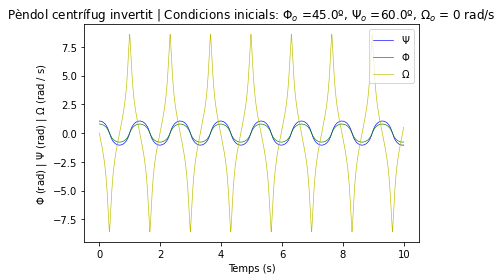

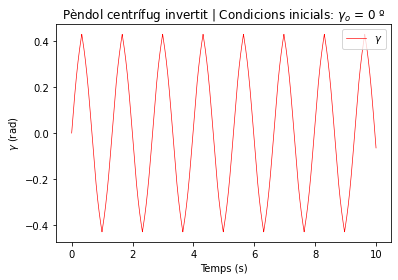

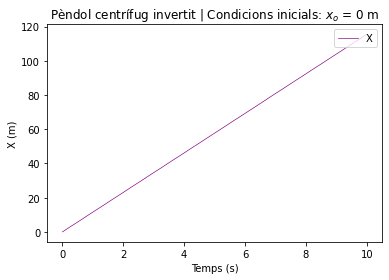

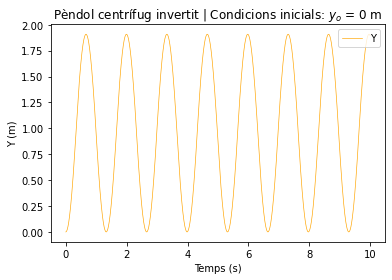

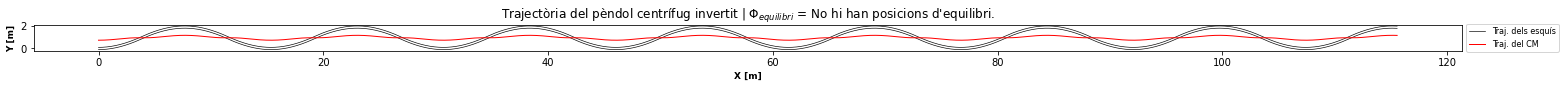

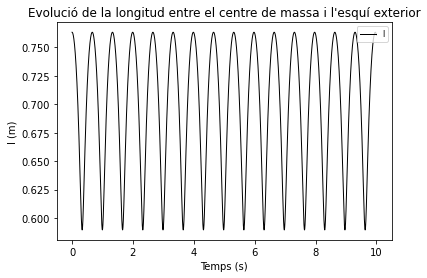

In [ ]:
import numpy as np
from numpy import sin,cos,sign,sqrt,arcsin,pi
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
from termcolor import colored
from matplotlib.pyplot import figure
import sympy as smp
from scipy.optimize import fsolve

class RootFinder:
    def __init__(self, start, stop, step=0.01, root_dtype="float64", xtol=1e-9):

        self.start = start
        self.stop = stop
        self.step = step
        self.xtol = xtol
        self.roots = np.array([], dtype=root_dtype)

    def add_to_roots(self, x):

        if (x < self.start) or (x > self.stop):
            return  # outside range
        if any(abs(self.roots - x) < self.xtol):
            return  # root already found.

        self.roots = np.append(self.roots, x)

    def find(self, f, *args):
        current = self.start

        for x0 in np.arange(self.start, self.stop + self.step, self.step):
            if x0 < current:
                continue
            x = self.find_root1(f, x0, *args)
            if x is None:  # no root found.
                continue
            current = x
            self.add_to_roots(x)

        return self.roots

    def find_root1(self, f, x0, *args):

        x, _, ier, _ = fsolve(f, x0=x0, args=args, full_output=True, xtol=self.xtol)
        if ier == 1:
            return x[0]
        return None

print(colored("ADVERTÈNCIA: EL SIMULADOR ÉS VÀLID FINS APROXIMADAMENT 65º-70º","red"))
g = 9.807
height = float(input("Alçada de l'esquiador (m): "))
l_o = 0.56*height
R_sc = float(input("Radi dels esquís (m): "))
V = float(input("Velocitat de l'esquiador durant el trajecte (m/s): "))
P_1 = float(input("Percentatge de flexió i extensió de les cames (0-100%): "))
b = P_1/100
P_2 = float(input("Percentatge d'angulació: "))
A = P_2/100
zeta = (V**2)/(g*R_sc)

def f(x):
  return np.sin(x)-zeta*(np.cos(x)/np.cos(x/A))

r = RootFinder(0, np.pi/2, 0.0001)
phi_eq = r.find(f)


if phi_eq.size>0:
  Phi_eq = round(phi_eq[0]*(180/np.pi), 3)
else:
  Phi_eq = "No hi han posicions d'equilibri"

if phi_eq.size>0:
  text2 = "${\Phi}_{equilibri}$ = ±"
else:
  text2 = "${\Phi}_{equilibri}$ = "

def equations(t,y):
    dy=np.zeros([2])
    dy[0] = y[1]
    dy[1] = (g/(A * l_o * (1-b * np.cos(A*y[0]))**(1./3)))*np.sin(A*y[0])-(V**2 * np.cos(A*y[0]) * np.sign(y[0]))/(l_o * (1-b * np.cos(A*y[0]))**(1./3) * R_sc * A * np.cos(y[0])) - (2 * b * (y[1])**2 * np.sin(A*y[0]))/(3*A-3* A * b * np.cos(A*y[0]))
    return dy

final_time = float(input("Temps final o duració del trajecte (s): "))
time = np.linspace(0, final_time, 20000)

if phi_eq.size>0:
  Phi_equilibri_arr = round(0.98*Phi_eq,3)
  print("Angle d'equilibri per referència: ±"+str(Phi_eq)+"º",  colored(("[NO POT PASSAR DE ± 0.99 · \u03A6  ≈ ± "+str(Phi_equilibri_arr)+"... º]"),"red"))
else:
  print("No hi ha posicions d'equilibri; és a dir, el pèndol/l'esquiador oscilarà constantment a qualsevol angle sempre i quan no sigui extrem (70º-90º, 90º seria inclinar-se paral·lelament amb el terra | A partir de 70º l'esquiador pateix fins a 3 g s de força en cas el cas que la pista sigui horitzontal, això requereix molta força muscular.)")
  print("Tot i així no l'angle dels esquís no pot sobrepassar els 90º, pel que \N{GREEK CAPITAL LETTER PHI}\N{SUBSCRIPT ZERO}≤ "+str(round(90*A,2))+"º")

initial_Phi = float(input("Angle inicial del pèndol/esquiador respecte de la vertical (º): "))
y0 = [np.radians(initial_Phi/A), np.radians(0.0)]


res = solve_ivp(equations, (0,final_time), y0, method='RK45', t_eval=time, dense_output=True, rtol=1e-8, atol=1e-10)

t, psi, omega = res.t, res.y[0], res.y[1]

dense1 = res.sol
def dgamma(t, gamma):
    Psi, Omega = dense1(t)

    return [(V*np.sign(Psi))/(R_sc*np.cos(Psi))]

initial_gamma = [np.radians(0.0)]

gamma_res = solve_ivp(dgamma, (0,final_time), initial_gamma, method="RK45", t_eval = time, dense_output=True, rtol=1e-8, atol=1e-10)
gamma_times, gammas = gamma_res.t, gamma_res.y

dense2 = gamma_res.sol
def dx(t, x):
    Gamma = dense2(t)

    return [V*np.cos(Gamma)]

initial_x = [0.0]

x_res = solve_ivp(dx, (0,final_time), initial_x, method="RK45", t_eval = time, dense_output=True, rtol=1e-8, atol=1e-10)
x_times, x_skis = x_res.t, x_res.y

def dy(t, y):
    Gamma = dense2(t)

    return [V*np.sin(Gamma)]

initial_y = [0.0]

y_res = solve_ivp(dy, (0,final_time), initial_y, method="RK45", t_eval = time, dense_output=True, rtol=1e-8, atol=1e-10)
y_times, y_skis = y_res.t, y_res.y[0]

plt.plot(t.T, psi.T,"b",linewidth = 0.65, label = "${\Psi}$")
plt.plot(t.T, A*psi.T,"g",linewidth = 0.65, label = "${\Phi}$")
plt.plot(t.T, omega.T,"y",linewidth = 0.65, label = "${\Omega}$")
s = 'Condicions inicials: ${\Phi}_{o}$ ='+str(initial_Phi)+'º, ${\Psi}_{o}$ ='+str(round(initial_Phi/A, 1))+'º, ${\Omega}_{o}$ = 0 rad/s'
plt.title('Pèndol centrífug invertit | '+ s)
plt.xlabel('Temps (s)')
plt.ylabel(u'${\Phi}$ (rad) | ${\Psi}$ (rad) | ${\Omega}$ (rad / s)')
plt.grid(False)
plt.legend(loc = "upper right")
plt.show()
plt.plot(gamma_times, gammas.T,"r",linewidth = 0.65, label = "${\gamma}$")
s = 'Condicions inicials: ${\gamma}_{o}$ = 0 º'
plt.title('Pèndol centrífug invertit | '+ s)
plt.xlabel('Temps (s)')
plt.ylabel(u'${\gamma}$ (rad)')
plt.grid(False)
plt.legend(loc = "upper right")
plt.axis()
plt.show()
plt.plot(x_times.T, x_skis.T,color = "purple",linewidth = 0.65, label = "X")
s = 'Condicions inicials: $x_{o}$ = 0 m'
plt.title('Pèndol centrífug invertit | '+ s)
plt.xlabel('Temps (s)')
plt.ylabel('X (m)')
plt.grid(False)
plt.legend(loc = "upper right")
plt.axis()
plt.show()
plt.plot(y_times.T, y_skis.T,color="orange",linewidth = 0.65, label = "Y")
s = 'Condicions inicials: $y_{o}$ = 0 m'
plt.title('Pèndol centrífug invertit | '+ s)
plt.xlabel('Temps (s)')
plt.ylabel('Y (m)')
plt.grid(False)
plt.legend(loc = "upper right")
plt.axis()
plt.show()

if phi_eq.size>0:
  text1 = '... º, ${\Phi}_{màx}$ = 0.99 · ${\Phi}_{equilibri}$'
else:
  text1 = "."

x_anim = []
y3_anim = []

plt.figure(figsize=(6.4*4,4.8*4))
plt.plot(x_skis.T, y_skis.T-0.1,color="black",linewidth = 0.65, label="Traj. dels esquís")
plt.plot(x_skis.T, y_skis.T+0.1,color="black",linewidth = 0.65)

for i in range (len(psi)):
  x_anim.append(x_skis.T[i])
  CM_Y = l_o * (1-b * np.cos(psi[i]))**(1./3) * np.sin(psi[i])
  y3_anim.append(y_skis.T[i]+CM_Y)

plt.plot(x_anim, y3_anim,"r", linewidth=1, label = "Traj. del CM")
plt.title('Trajectòria del pèndol centrífug invertit | '+text2+str(Phi_eq)+text1)
plt.xlabel('X [m]',fontsize=9, fontweight = "bold")
plt.ylabel('Y [m]',fontsize=9, fontweight = "bold")
plt.legend(loc='center left',fontsize=8, bbox_to_anchor=(1, 0.5))
plt.axis("scaled")
plt.show()

l = l_o * (1-b * np.cos(A*psi))**(1./3)
plt.plot(t.T, l.T,"k", linewidth=1, label ="l")
plt.title("Evolució de la longitud entre el centre de massa i l'esquí exterior")
plt.xlabel('Temps (s)')
plt.ylabel('l (m)')
plt.legend(loc="upper right", fontsize=8)
plt.show()

# **Períodes del pèndol invertit bàsic**



Variables que et demanarà:


*   **Alçada de l'esquiador (m) per calcular la posició aproximada del CM (centre de massa)**
*   **Radi dels esquís (m)**
*   **Velocitat de l'esquiador durant el trajecte (m/s)(constant)**

---
Normes per al correcte funcionament del simulador:

-Nombres decimals amb '  .  ' , no amb '  ,  '  .

**Correcte :** 12.7

**Incorrecte :** 12,7


---
Per iniciar la simulació cliqueu el botó de "play" al racó superior esquerre del codi o bé feu la combinació de botons 

```
Ctrl+Enter
```




ADVERTÈNCIA: EL SIMULADOR ÉS VÀLID FINS APROXIMADAMENT 65º-70º
Alçada de l'esquiador (m): 1.8
Radi dels esquís (m): 14
Velocitat de l'esquiador durant el trajecte (m/s): 12
L'angle crític a què és vàlid el període és 60.09º
No hi han posicions d'equilibri; és a dir, el pèndol/l'esquiador oscilarà constantment a qualsevol angle sempre i quan no sigui extrem (70º-90º, 90º seria inclinar-se paral·lelament amb el terra | A partir de 70º l'esquiador pateix fins a 3 g s de força en cas el cas que la pista sigui horitzontal, això requereix molta força muscular.)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


T= 0.542 s per Φ₀= 5º
T= 0.797 s per Φ₀= 10º
T= 1.018 s per Φ₀= 15º
T= 1.229 s per Φ₀= 20º
T= 1.442 s per Φ₀= 25º
T= 1.664 s per Φ₀= 30º
T= 1.901 s per Φ₀= 35º
T= 2.159 s per Φ₀= 40º
T= 2.446 s per Φ₀= 45º
T= 2.769 s per Φ₀= 50º
T= 3.14 s per Φ₀= 55º
T= 3.57 s per Φ₀= 60º
T= 4.075 s per Φ₀= 65º
T= 4.673 s per Φ₀= 70º
T= 5.376 s per Φ₀= 75º
T= 6.174 s per Φ₀= 80º
T= 7.006 s per Φ₀= 85º
T= 7.735 s per Φ₀= 90º


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.


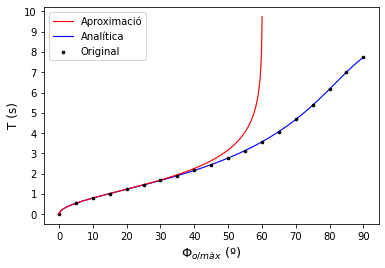

In [ ]:
import numpy as np
from numpy import sin,cos,sign,sqrt,arcsin,pi
from scipy.integrate import solve_ivp, quad
from matplotlib import pyplot as plt
from termcolor import colored
from matplotlib.pyplot import figure
import sympy as smp

print(colored("ADVERTÈNCIA: EL SIMULADOR ÉS VÀLID FINS APROXIMADAMENT 65º-70º","red"))
g = 9.807
height = float(input("Alçada de l'esquiador (m): "))
l = 0.56*height
R_sc = float(input("Radi dels esquís (m): "))
V = float(input("Velocitat de l'esquiador durant el trajecte (m/s): "))
zeta = V**2/(g*R_sc)

print("L'angle crític a què és vàlid el període és "+str(round(zeta*180/np.pi, 2))+"º")

if zeta*180/np.pi>90:
  psi_max1 = np.linspace(0, 90, 1000)
else:
  psi_max1 = np.linspace(0, zeta*180/np.pi, 1000)

T_approx = 4*np.sqrt(l/g)*np.log(np.abs(((psi_max1*np.pi/180)-zeta)/(np.sqrt(2*zeta*(psi_max1*np.pi/180)-(psi_max1*np.pi/180)**2)-zeta)))

if V**2/(g*R_sc)<1:
  Phi_eq = round(np.arcsin(V**2/(g*R_sc))*(180/np.pi), 3)
else:
  Phi_eq = "No hi han posicions d'equilibri"

if V**2/(g*R_sc)<1:
  text2 = "${\Phi}_{equilibri}$ = ±"
else:
  text2 = "${\Phi}_{equilibri}$ = "

if V**2/(g*R_sc)<1:
    Phi_equilibri_arr = round(0.98*Phi_eq,3)
    print("Angle d'equilibri per referència: ±"+str(Phi_eq)+"º",  colored(("[NO POT PASSAR DE ± 0.99 · \u03A6  ≈ ± "+str(Phi_equilibri_arr)+"... º]"),"red"))
else:
    print("No hi han posicions d'equilibri; és a dir, el pèndol/l'esquiador oscilarà constantment a qualsevol angle sempre i quan no sigui extrem (70º-90º, 90º seria inclinar-se paral·lelament amb el terra | A partir de 70º l'esquiador pateix fins a 3 g s de força en cas el cas que la pista sigui horitzontal, això requereix molta força muscular.)")

def solveit(initial_Psi):
  def equations(t,y):
      dy=np.zeros([2])
      dy[0] = y[1]
      dy[1] = (g/l)*np.sin(y[0])-(V**2/(l*R_sc))*np.sign(y[0])

      return dy

  time = np.linspace(0, 10, 100000)

  y0 = [np.radians(initial_Psi), np.radians(0.0)]

  res = solve_ivp(equations, (0,10), y0, method='RK45', t_eval=time, dense_output=True, rtol=1e-8, atol=1e-10)

  t, psi, omega = res.t, res.y[0], res.y[1]

  def find_roots(x,y):
      s = np.abs(np.diff(np.sign(y))).astype(bool)
      return x[:-1][s] + np.diff(x)[s]/(np.abs(y[1:][s]/y[:-1][s])+1)

  T_ini_o = find_roots(t.T,psi.T)
  print("T= "+str(round(4*T_ini_o[0], 3))+" s per \N{GREEK CAPITAL LETTER PHI}\N{SUBSCRIPT ZERO}= "+str(round(initial_Psi,2))+"º")
  plt.scatter(initial_Psi, 4*T_ini_o[0], c="k",s=7, zorder=2)

if V**2/(g*R_sc)<=1:
  initial_Psi_list= np.linspace(1, int(180*np.arcsin(zeta)/np.pi),10)
else:
  initial_Psi_list= [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]

fig = plt.figure()

for initial_Psi_case in initial_Psi_list:
  solveit(initial_Psi_case)

T_exact = []

if V**2/(g*R_sc)<=1:
  psi_max2 = np.linspace(1, 180*np.arcsin(zeta)/np.pi,1000)
else:
  psi_max2 = np.linspace(0, 90, 1000)

for i in psi_max2:
  def f(x):
     return 1/np.sqrt((np.cos(i*np.pi/180)-np.cos(x))+zeta*(np.abs(i*np.pi/180)-np.abs(x)))
  
  T_exact.append(2*np.sqrt(2)*np.sqrt(l/g)*quad(f, 0, i*np.pi/180)[0])

plt.plot(psi_max1, T_approx,"r",linewidth = 1.15, label="Aproximació", zorder=1)
plt.plot(psi_max2, T_exact,"b",linewidth = 1.15, label="Analítica", zorder=0)
plt.scatter(0, 0, c="k", s=7, label="Original")
plt.legend()
plt.ylim(0,10)
plt.axis("auto")
plt.xlabel(u'${\Phi_{o/màx}}$ (º)', fontsize=13)
plt.ylabel('T (s)', fontsize=12)

if V**2/(g*R_sc)<=1:
  plt.xticks(np.arange(0, int(180*np.arcsin(zeta)/np.pi)+int(180*np.arcsin(zeta)/np.pi)/10, int(180*np.arcsin(zeta)/np.pi)/10))
else:
  plt.xticks(np.arange(0, 100, 10))

plt.yticks(np.arange(0, 11, 1))
plt.show()

# **Períodes del pèndol invertit amb flexió i extensió de cames afegits**



Variables que et demanarà:


*   **Alçada de l'esquiador (m) per calcular la posició aproximada del CM (centre de massa)**
*   **Radi dels esquís (m)**
*   **Velocitat de l'esquiador durant el trajecte (m/s)(constant)**

*   **Percentatge de flexió i extensió de les cames ($\eta$):** quan l'esquiador està en posició vertical les cames estan flexionades, per altra banda, si està al extrem de la curva la cama exterior està extesa (l'altra és paral·lela a l'exterior i, per tant, sempre està flexionada, vertical o no vertical). Generalment, com més petit és el percentatge, menys es nota la flexió i extensió de cames, i, a l'inrevés, com més s'aproxima al 100% més es nota la flexió i extensió de cames.
---
Normes per al correcte funcionament del simulador:

-Nombres decimals amb '  .  ' , no amb '  ,  '  .

**Correcte :** 12.7

**Incorrecte :** 12,7


---
Per iniciar la simulació cliqueu el botó de "play" al racó superior esquerre del codi o bé feu la combinació de botons 

```
Ctrl+Enter
```




ADVERTÈNCIA: EL SIMULADOR ÉS VÀLID FINS APROXIMADAMENT 65º-70º
Alçada de l'esquiador (m): 1.8
Radi dels esquís (m): 14
Velocitat de l'esquiador durant el trajecte (m/s): 12
Percentatge de flexió i extensió de les cames (0-100%): 80
L'angle crític a què és vàlid el període és 60.09º
No hi han posicions d'equilibri; és a dir, el pèndol/l'esquiador oscilarà constantment a qualsevol angle sempre i quan no sigui extrem (70º-90º, 90º seria inclinar-se paral·lelament amb el terra | A partir de 70º l'esquiador pateix fins a 3 g s de força en cas el cas que la pista sigui horitzontal, això requereix molta força muscular.)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


T= 0.415 s per Φ₀= 5º
T= 0.609 s per Φ₀= 10º
T= 0.778 s per Φ₀= 15º
T= 0.94 s per Φ₀= 20º
T= 1.104 s per Φ₀= 25º
T= 1.277 s per Φ₀= 30º
T= 1.465 s per Φ₀= 35º
T= 1.674 s per Φ₀= 40º
T= 1.91 s per Φ₀= 45º
T= 2.182 s per Φ₀= 50º
T= 2.5 s per Φ₀= 55º
T= 2.877 s per Φ₀= 60º
T= 3.329 s per Φ₀= 65º
T= 3.873 s per Φ₀= 70º
T= 4.525 s per Φ₀= 75º
T= 5.277 s per Φ₀= 80º
T= 6.071 s per Φ₀= 85º
T= 6.77 s per Φ₀= 90º


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:93: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.


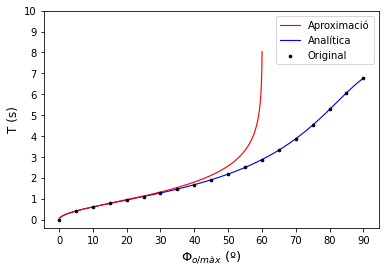

In [ ]:
import numpy as np
from numpy import sin,cos,sign,sqrt,arcsin,pi
from scipy.integrate import solve_ivp, quad
from matplotlib import pyplot as plt
from termcolor import colored
from matplotlib.pyplot import figure
import sympy as smp
from scipy import special

print(colored("ADVERTÈNCIA: EL SIMULADOR ÉS VÀLID FINS APROXIMADAMENT 65º-70º","red"))
g = 9.807
height = float(input("Alçada de l'esquiador (m): "))
l_o = 0.56*height
R_sc = float(input("Radi dels esquís (m): "))
V = float(input("Velocitat de l'esquiador durant el trajecte (m/s): "))
P = float(input("Percentatge de flexió i extensió de les cames (0-100%): "))
b = P/100
zeta = V**2/(g*R_sc)

print("L'angle crític a què és vàlid el període és "+str(round(zeta*180/np.pi, 2))+"º")

if zeta*180/np.pi>90:
  psi_max1 = np.linspace(0, 90, 1000)
else:
  psi_max1 = np.linspace(0, zeta*180/np.pi, 1000)

l_avg = (1/(l_o * np.radians(psi_max1))) * (1/(1-b))**(1/3) * np.radians(psi_max1) *special.hyp2f1(1/3, 1/2, 3/2, (b/(2*b-2)) * (np.radians(psi_max1))**2)
T_approx = 4*np.sqrt(1/(l_avg * g))*np.log(np.abs(((psi_max1*np.pi/180)-zeta)/(np.sqrt(2*zeta*(psi_max1*np.pi/180)-(psi_max1*np.pi/180)**2)-zeta)))

if V**2/(g*R_sc)<1:
  Phi_eq = round(np.arcsin(V**2/(g*R_sc))*(180/np.pi), 3)
else:
  Phi_eq = "No hi han posicions d'equilibri"

if V**2/(g*R_sc)<1:
  text2 = "${\Phi}_{equilibri}$ = ±"
else:
  text2 = "${\Phi}_{equilibri}$ = "

if V**2/(g*R_sc)<1:
    Phi_equilibri_arr = round(0.98*Phi_eq,3)
    print("Angle d'equilibri per referència: ±"+str(Phi_eq)+"º",  colored(("[NO POT PASSAR DE ± 0.99 · \u03A6  ≈ ± "+str(Phi_equilibri_arr)+"... º]"),"red"))
else:
    print("No hi han posicions d'equilibri; és a dir, el pèndol/l'esquiador oscilarà constantment a qualsevol angle sempre i quan no sigui extrem (70º-90º, 90º seria inclinar-se paral·lelament amb el terra | A partir de 70º l'esquiador pateix fins a 3 g s de força en cas el cas que la pista sigui horitzontal, això requereix molta força muscular.)")

def solveit(initial_Psi):
  def equations(t,y):
      dy=np.zeros([2])
      dy[0] = y[1]
      dy[1] = (g/(l_o*(1-b*np.cos(y[0]))**(1./3)))*np.sin(y[0])-((V**2)/(R_sc*l_o*(1-b*np.cos(y[0]))**(1./3)))*np.sign(y[0]) - (2 * b * (y[1])**2 * np.sin(y[0]))/(3-3 * b * np.cos(y[0]))

      return dy

  time = np.linspace(0, 10, 100000)

  y0 = [np.radians(initial_Psi), np.radians(0.0)]

  res = solve_ivp(equations, (0,10), y0, method='RK45', t_eval=time, dense_output=True, rtol=1e-8, atol=1e-10)

  t, psi, omega = res.t, res.y[0], res.y[1]

  def find_roots(x,y):
      s = np.abs(np.diff(np.sign(y))).astype(bool)
      return x[:-1][s] + np.diff(x)[s]/(np.abs(y[1:][s]/y[:-1][s])+1)

  T_ini_o = find_roots(t.T,psi.T)
  print("T= "+str(round(4*T_ini_o[0], 3))+" s per \N{GREEK CAPITAL LETTER PHI}\N{SUBSCRIPT ZERO}= "+str(round(initial_Psi,2))+"º")
  plt.scatter(initial_Psi, 4*T_ini_o[0], c="k",s=7, zorder=2)

if V**2/(g*R_sc)<=1:
  initial_Psi_list= np.linspace(1, int(180*np.arcsin(zeta)/np.pi),10)
else:
  initial_Psi_list= [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]

fig = plt.figure()
for initial_Psi_case in initial_Psi_list:
  solveit(initial_Psi_case)

T_exact = []

if V**2/(g*R_sc)<=1:
  psi_max2 = np.linspace(1, 180*np.arcsin(zeta)/np.pi,1000)
else:
  psi_max2 = np.linspace(0, 90, 1000)

for i in psi_max2:
  def f(x):
     return (1-b*np.cos(x))**(1./3)
  def I1(x):
     return ((1/2)*b*np.cos(x)-1)*np.cos(x) + (b*np.abs(np.sin(x))-np.abs(x))*zeta
  def I2(x):
     return ((f(x))**2)/(np.sqrt(I1(x)-I1(i*np.pi/180)))
  T_exact.append(2*np.sqrt(2)*np.sqrt(l_o/g)*quad(I2, 0, i*np.pi/180)[0])

plt.plot(psi_max1, T_approx,"r",linewidth = 1.15, label="Aproximació", zorder=1)
plt.plot(psi_max2, T_exact,"b",linewidth = 1.15, label="Analítica", zorder=0)
plt.scatter(0, 0, c="k", s=7, label="Original")
plt.legend()
plt.ylim(0,10)
plt.axis("auto")
plt.xlabel(u'${\Phi_{o/màx}}$ (º)', fontsize=13)
plt.ylabel('T (s)', fontsize=12)

if V**2/(g*R_sc)<=1:
  plt.xticks(np.arange(0, int(180*np.arcsin(zeta)/np.pi)+int(180*np.arcsin(zeta)/np.pi)/10, int(180*np.arcsin(zeta)/np.pi)/10))
else:
  plt.xticks(np.arange(0, 100, 10))

plt.yticks(np.arange(0, 11, 1))
plt.show()

# **Períodes del pèndol invertit amb angulació**



Variables que et demanarà:


*   **Alçada de l'esquiador (m) per calcular la posició aproximada del CM (centre de massa)**
*   **Radi dels esquís (m)**
*   **Velocitat de l'esquiador durant el trajecte (m/s)(constant)**

* **Percentatge d'angulació ($\xi$):** l'angle de l'esquí sempre serà més gran que la de l'esquiador. Està comprès entre 0-100%. A 100% no hi ha angulació, atès que és com si multipliquessis per 1.
---
Normes per al correcte funcionament del simulador:

-Nombres decimals amb '  .  ' , no amb '  ,  '  .

**Correcte :** 12.7

**Incorrecte :** 12,7


---
Per iniciar la simulació cliqueu el botó de "play" al racó superior esquerre del codi o bé feu la combinació de botons 

```
Ctrl+Enter
```




ADVERTÈNCIA: EL SIMULADOR ÉS VÀLID FINS APROXIMADAMENT 65º-70º
Alçada de l'esquiador (m): 1.8
Radi dels esquís (m): 14
Velocitat de l'esquiador durant el trajecte (m/s): 12
Depenent de quin percentatge elegeixis, l'angle inicial màxim a què es graficarà el període canviarà perquè Ψ no pot sobrepassar els 90º.
Percentatge d'angulació: 75
Es graficarà fins a aproximadament Φ₀= 67.5º
No hi han posicions d'equilibri; és a dir, el pèndol/l'esquiador oscilarà constantment a qualsevol angle sempre i quan no sigui extrem (70º-90º, 90º seria inclinar-se paral·lelament amb el terra | A partir de 70º l'esquiador pateix fins a 3 g s de força en cas el cas que la pista sigui horitzontal, això requereix molta força muscular.)
No hi ha valors crítics


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in true_divide


T= 0.541 s per Φ₀= 5.0º
T= 0.823 s per Φ₀= 10.68º
T= 1.058 s per Φ₀= 16.35º
T= 1.272 s per Φ₀= 22.03º
T= 1.469 s per Φ₀= 27.71º
T= 1.644 s per Φ₀= 33.39º
T= 1.785 s per Φ₀= 39.06º
T= 1.874 s per Φ₀= 44.74º
T= 1.888 s per Φ₀= 50.42º
T= 1.803 s per Φ₀= 56.1º
T= 1.576 s per Φ₀= 61.77º
T= 0.791 s per Φ₀= 67.45º


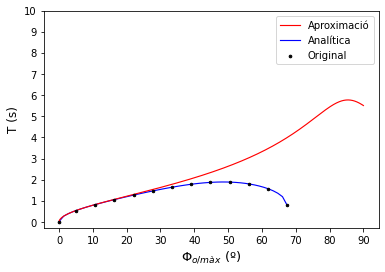

In [ ]:
import numpy as np
from numpy import sin,cos,sign,sqrt,arcsin,pi
from scipy.integrate import solve_ivp, quad
from matplotlib import pyplot as plt
from termcolor import colored
from matplotlib.pyplot import figure
import sympy as smp
from scipy.signal import find_peaks
from scipy.optimize import fsolve
from scipy import interpolate
from scipy.interpolate import interp1d


class RootFinder:
    def __init__(self, start, stop, step=0.01, root_dtype="float64", xtol=1e-9):

        self.start = start
        self.stop = stop
        self.step = step
        self.xtol = xtol
        self.roots = np.array([], dtype=root_dtype)

    def add_to_roots(self, x):

        if (x < self.start) or (x > self.stop):
            return  # outside range
        if any(abs(self.roots - x) < self.xtol):
            return  # root already found.

        self.roots = np.append(self.roots, x)

    def find(self, f, *args):
        current = self.start

        for x0 in np.arange(self.start, self.stop + self.step, self.step):
            if x0 < current:
                continue
            x = self.find_root1(f, x0, *args)
            if x is None:  # no root found.
                continue
            current = x
            self.add_to_roots(x)

        return self.roots

    def find_root1(self, f, x0, *args):

        x, _, ier, _ = fsolve(f, x0=x0, args=args, full_output=True, xtol=self.xtol)
        if ier == 1:
            return x[0]
        return None


print(colored("ADVERTÈNCIA: EL SIMULADOR ÉS VÀLID FINS APROXIMADAMENT 65º-70º","red"))
g = 9.807
height = float(input("Alçada de l'esquiador (m): "))
l = 0.56*height
R_sc = float(input("Radi dels esquís (m): "))
V = float(input("Velocitat de l'esquiador durant el trajecte (m/s): "))
print(colored("Depenent de quin percentatge elegeixis, l'angle inicial màxim a què es graficarà el període canviarà perquè \u03A8 no pot sobrepassar els 90º.","red"))
P = float(input("Percentatge d'angulació: "))
A = P/100
print("Es graficarà fins a aproximadament \N{GREEK CAPITAL LETTER PHI}\N{SUBSCRIPT ZERO}= "+str(round(90*A,2))+"º")
zeta = (V**2)/(g*R_sc)

def f(x):
  return np.sin(x)-zeta*(np.cos(x)/np.cos(x/A))

r = RootFinder(0, np.pi/2, 0.0001)
phi_eq = r.find(f)

if phi_eq.size>0:
    print("Angle d'equilibri per referència: ±"+str(round(np.degrees(phi_eq[0]),2))+"º",  colored(("[NO POT PASSAR DE ± 0.99 · \u03A6  ≈ ± "+str(round(0.98*np.degrees(phi_eq[0]),3))+"... º]"),"red"))
else:
    print("No hi han posicions d'equilibri; és a dir, el pèndol/l'esquiador oscilarà constantment a qualsevol angle sempre i quan no sigui extrem (70º-90º, 90º seria inclinar-se paral·lelament amb el terra | A partir de 70º l'esquiador pateix fins a 3 g s de força en cas el cas que la pista sigui horitzontal, això requereix molta força muscular.)")

def f_critica(x):
    return np.sqrt(2*x*(zeta/A)*(np.sin(x)/np.sin(x/A))-x**2)-(zeta/A)*(np.sin(x)/np.sin(x/A))

xs = np.linspace(np.finfo("float64").eps, np.pi/2, 1000000)
ys = f_critica(xs)
idx, _ = find_peaks(ys)
x_argmaxima = xs[idx]
y_maxima = ys[idx]

if not np.isclose(y_maxima, 0, atol = 1e-7).any():
  print("No hi ha valors crítics")
else:
  print("L'angle crític a què és vàlid el període és "+str(round((180/np.pi)*x_argmaxima[0], 2))+"º")


if not np.isclose(y_maxima, 0, atol = 1e-7).any():
  psi_max1 = np.linspace(0, 90, 1000)
else:
  psi_max1 = np.linspace(0, (180/np.pi)*x_argmaxima[0] -0.2, 1000)

quo_avg = np.sin(psi_max1*np.pi/180)/(A*np.sin((psi_max1*np.pi/180)/A))
T_approx = 4*np.sqrt(l/g)*np.log(np.abs(((psi_max1*np.pi/180)-(zeta)*(quo_avg))/(np.sqrt(2*(zeta)*(quo_avg)*(psi_max1*np.pi/180)-(psi_max1*np.pi/180)**2)-(zeta)*(quo_avg))))

if phi_eq.size>0:
  initial_Psi_list1 = np.linspace(1, np.degrees(phi_eq[0])-0.05, 10)
else:
  initial_Psi_list1 = np.linspace(5, A*90 -0.05, 12)

if phi_eq.size>0:
  initial_Psi_list2 = np.linspace(1, np.degrees(phi_eq[0])-0.05,50)
else:
  initial_Psi_list2 = np.linspace(0.01, A*90 -0.05, 50)

def solveit_exact(initial_Psi):
  def equations(t,y):
      dy=np.zeros([2])
      dy[0] = y[1]
      dy[1] = (g/l)*np.sin(y[0])-(V**2 * np.cos(y[0]) * np.sign(y[0]/A))/(l*R_sc*np.cos(y[0]/A))

      return dy

  time = np.linspace(0, 10, 100000)

  y0 = [np.radians(initial_Psi), np.radians(0.0)]

  res = solve_ivp(equations, (0,10), y0, method='RK45', t_eval=time, dense_output=True, rtol=1e-8, atol=1e-10)

  t, psi, omega = res.t, res.y[0], res.y[1]

  def find_root2(x,y):
      s = np.abs(np.diff(np.sign(y))).astype(bool)
      return x[:-1][s] + np.diff(x)[s]/(np.abs(y[1:][s]/y[:-1][s])+1)

  T_ini_o = find_root2(t.T,psi.T)
  T_exact.append(4*T_ini_o[0])
  

fig = plt.figure()

T_exact = []
for initial_Psi_case in initial_Psi_list2:
  solveit_exact(initial_Psi_case)

interpolar = interpolate.interp1d(initial_Psi_list2, T_exact, kind="linear")
T_original = interpolar(initial_Psi_list1)

for i, j in zip(T_original, initial_Psi_list1):
  print("T= "+str(round(i, 3))+" s per \N{GREEK CAPITAL LETTER PHI}\N{SUBSCRIPT ZERO}= "+str(round(j,2))+"º")

plt.plot(initial_Psi_list1, T_original, 'o', color ='k', markersize=2.5, zorder=2)
plt.plot(psi_max1, T_approx,"r",linewidth = 1.15, label="Aproximació", zorder=1)
plt.plot(initial_Psi_list2, T_exact,"b",linewidth = 1.15, label="Analítica", zorder=0)
plt.scatter(0, 0, c="k", s=7, label="Original")
plt.legend()
plt.axis("auto")
plt.xlabel(u'${\Phi_{o/màx}}$ (º)', fontsize=13)
plt.ylabel('T (s)', fontsize=12)
#plt.xlim()
#plt.ylim()

if phi_eq.size>0:
  plt.xticks(np.arange(0, int(np.degrees(phi_eq[0]))+int(np.degrees(phi_eq[0]))/10, int(np.degrees(phi_eq[0]))/10))
else:
  plt.xticks(np.arange(0, 100, 10))

plt.yticks(np.arange(0, 11, 1))
plt.show()

# **Períodes del pèndol invertit amb angulació, flexió i extensió de cames afegits**



Variables que et demanarà:


*   **Alçada de l'esquiador (m) per calcular la posició aproximada del CM (centre de massa)**
*   **Radi dels esquís (m)**
*   **Velocitat de l'esquiador durant el trajecte (m/s)(constant)**

*   **Percentatge de flexió i extensió de les cames ($\eta$):** quan l'esquiador està en posició vertical les cames estan flexionades, per altra banda, si està al extrem de la curva la cama exterior està extesa (l'altra és paral·lela a l'exterior i, per tant, sempre està flexionada, vertical o no vertical). Generalment, com més petit és el percentatge, menys es nota la flexió i extensió de cames, i, a l'inrevés, com més s'aproxima al 100% més es nota la flexió i extensió de cames.
* **Percentatge d'angulació ($\xi$):** l'angle de l'esquí sempre serà més gran que la de l'esquiador. Està comprès entre 0-100%. A 100% no hi ha angulació, atès que és com si multipliquessis per 1.
---
Normes per al correcte funcionament del simulador:

-Nombres decimals amb '  .  ' , no amb '  ,  '  .

**Correcte :** 12.7

**Incorrecte :** 12,7


---
Per iniciar la simulació cliqueu el botó de "play" al racó superior esquerre del codi o bé feu la combinació de botons 

```
Ctrl+Enter
```




ADVERTÈNCIA: EL SIMULADOR ÉS VÀLID FINS APROXIMADAMENT 65º-70º
Alçada de l'esquiador (m): 1.8
Radi dels esquís (m): 14
Velocitat de l'esquiador durant el trajecte (m/s): 12
Percentatge de flexió i extensió de les cames (0-100%): 80
Depenent de quin percentatge elegeixis, l'angle inicial màxim a què es graficarà el període canviarà perquè Ψ no pot sobrepassar els 90º.
Percentatge d'angulació: 75
Es graficarà fins a aproximadament Φ₀= 67.5º
No hi han posicions d'equilibri; és a dir, el pèndol/l'esquiador oscilarà constantment a qualsevol angle sempre i quan no sigui extrem (70º-90º, 90º seria inclinar-se paral·lelament amb el terra | A partir de 70º l'esquiador pateix fins a 3 g s de força en cas el cas que la pista sigui horitzontal, això requereix molta força muscular.)
No hi ha valors crítics


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:100: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:100: RuntimeWarning: invalid value encountered in multiply


T= 0.413 s per Φ₀= 5.0º
T= 0.629 s per Φ₀= 10.68º
T= 0.809 s per Φ₀= 16.35º
T= 0.973 s per Φ₀= 22.03º
T= 1.124 s per Φ₀= 27.71º
T= 1.26 s per Φ₀= 33.39º
T= 1.369 s per Φ₀= 39.06º
T= 1.436 s per Φ₀= 44.74º
T= 1.442 s per Φ₀= 50.42º
T= 1.362 s per Φ₀= 56.1º
T= 1.162 s per Φ₀= 61.77º
T= 0.518 s per Φ₀= 67.45º


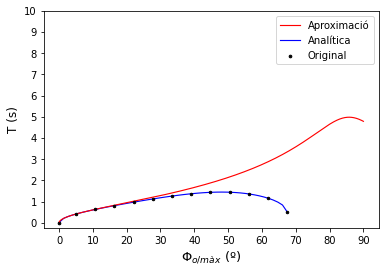

In [ ]:
import numpy as np
from numpy import sin,cos,sign,sqrt,arcsin,pi
from scipy.integrate import solve_ivp, quad
from matplotlib import pyplot as plt
from termcolor import colored
from matplotlib.pyplot import figure
import sympy as smp
from scipy.signal import find_peaks
from scipy.optimize import fsolve
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy import special

class RootFinder:
    def __init__(self, start, stop, step=0.01, root_dtype="float64", xtol=1e-9):

        self.start = start
        self.stop = stop
        self.step = step
        self.xtol = xtol
        self.roots = np.array([], dtype=root_dtype)

    def add_to_roots(self, x):

        if (x < self.start) or (x > self.stop):
            return  # outside range
        if any(abs(self.roots - x) < self.xtol):
            return  # root already found.

        self.roots = np.append(self.roots, x)

    def find(self, f, *args):
        current = self.start

        for x0 in np.arange(self.start, self.stop + self.step, self.step):
            if x0 < current:
                continue
            x = self.find_root1(f, x0, *args)
            if x is None:  # no root found.
                continue
            current = x
            self.add_to_roots(x)

        return self.roots

    def find_root1(self, f, x0, *args):

        x, _, ier, _ = fsolve(f, x0=x0, args=args, full_output=True, xtol=self.xtol)
        if ier == 1:
            return x[0]
        return None


print(colored("ADVERTÈNCIA: EL SIMULADOR ÉS VÀLID FINS APROXIMADAMENT 65º-70º","red"))
g = 9.807
height = float(input("Alçada de l'esquiador (m): "))
l_o = 0.56*height
R_sc = float(input("Radi dels esquís (m): "))
V = float(input("Velocitat de l'esquiador durant el trajecte (m/s): "))
P_1 = float(input("Percentatge de flexió i extensió de les cames (0-100%): "))
b = P_1/100
print(colored("Depenent de quin percentatge elegeixis, l'angle inicial màxim a què es graficarà el període canviarà perquè \u03A8 no pot sobrepassar els 90º.","red"))
P_2 = float(input("Percentatge d'angulació: "))
A = P_2/100
print("Es graficarà fins a aproximadament \N{GREEK CAPITAL LETTER PHI}\N{SUBSCRIPT ZERO}= "+str(round(90*A,2))+"º")
zeta = (V**2)/(g*R_sc)

def f(x):
  return np.sin(x)-zeta*(np.cos(x)/np.cos(x/A))

r = RootFinder(0, np.pi/2, 0.0001)
phi_eq = r.find(f)

if phi_eq.size>0:
    print("Angle d'equilibri per referència: ±"+str(round(np.degrees(phi_eq[0]),2))+"º",  colored(("[NO POT PASSAR DE ± 0.99 · \u03A6  ≈ ± "+str(round(0.98*np.degrees(phi_eq[0]),3))+"... º]"),"red"))
else:
    print("No hi han posicions d'equilibri; és a dir, el pèndol/l'esquiador oscilarà constantment a qualsevol angle sempre i quan no sigui extrem (70º-90º, 90º seria inclinar-se paral·lelament amb el terra | A partir de 70º l'esquiador pateix fins a 3 g s de força en cas el cas que la pista sigui horitzontal, això requereix molta força muscular.)")

def f_critica(x):
    return np.sqrt(2*x*(zeta/A)*(np.sin(x)/np.sin(x/A))-x**2)-(zeta/A)*(np.sin(x)/np.sin(x/A))

xs = np.linspace(np.finfo("float64").eps, np.pi/2, 1000000)
ys = f_critica(xs)
idx, _ = find_peaks(ys)
x_argmaxima = xs[idx]
y_maxima = ys[idx]

if not np.isclose(y_maxima, 0, atol = 1e-7).any():
  print("No hi ha valors crítics")
else:
  print("L'angle crític a què és vàlid el període és "+str(round((180/np.pi)*x_argmaxima[0], 2))+"º")

if not np.isclose(y_maxima, 0, atol = 1e-7).any():
  psi_max1 = np.linspace(0, 90, 1000)
else:
  psi_max1 = np.linspace(0, (180/np.pi)*x_argmaxima[0] -0.2, 1000)


quo_avg = np.sin(psi_max1*np.pi/180)/(A*np.sin((psi_max1*np.pi/180)/A))
l_avg = (1/(l_o * np.radians(psi_max1))) * (1/(1-b))**(1/3) * np.radians(psi_max1) *special.hyp2f1(1/3, 1/2, 3/2, (b/(2*b-2)) * (np.radians(psi_max1))**2)
T_approx = 4*np.sqrt(1/(l_avg * g))*np.log(np.abs(((psi_max1*np.pi/180)-(zeta)*(quo_avg))/(np.sqrt(2*(zeta)*(quo_avg)*(psi_max1*np.pi/180)-(psi_max1*np.pi/180)**2)-(zeta)*(quo_avg))))

if phi_eq.size>0:
  initial_Psi_list1 = np.linspace(1, np.degrees(phi_eq[0])-0.05, 10)
else:
  initial_Psi_list1 = np.linspace(5, A*90-0.05, 12)

if phi_eq.size>0:
  initial_Psi_list2 = np.linspace(1, np.degrees(phi_eq[0])-0.05 ,50)
else:
  initial_Psi_list2 = np.linspace(0.01, A*90-0.05, 50)

def solveit_exact(initial_Psi):
  def equations(t,y):
      dy=np.zeros([2])
      dy[0] = y[1]
      dy[1] = (g/(l_o * (1-b * np.cos(y[0]))**(1./3)))*np.sin(y[0])-(V**2 * np.cos(y[0]) * np.sign(y[0]/A))/(l_o * (1-b * np.cos(y[0]))**(1./3) * R_sc * np.cos(y[0]/A)) - (2 * b * (y[1])**2 * np.sin(y[0]))/(3-3 * b * np.cos(y[0]))
      return dy

  time = np.linspace(0, 10, 100000)

  y0 = [np.radians(initial_Psi), np.radians(0.0)]

  res = solve_ivp(equations, (0,10), y0, method='RK45', t_eval=time, dense_output=True, rtol=1e-8, atol=1e-10)

  t, psi, omega = res.t, res.y[0], res.y[1]

  def find_root2(x,y):
      s = np.abs(np.diff(np.sign(y))).astype(bool)
      return x[:-1][s] + np.diff(x)[s]/(np.abs(y[1:][s]/y[:-1][s])+1)

  T_ini_o = find_root2(t.T,psi.T)
  T_exact.append(4*T_ini_o[0])
  

fig = plt.figure()

T_exact = []
for initial_Psi_case in initial_Psi_list2:
  solveit_exact(initial_Psi_case)

interpolar = interpolate.interp1d(initial_Psi_list2, T_exact, kind="linear")
T_original = interpolar(initial_Psi_list1)

for i, j in zip(T_original, initial_Psi_list1):
  print("T= "+str(round(i, 3))+" s per \N{GREEK CAPITAL LETTER PHI}\N{SUBSCRIPT ZERO}= "+str(round(j,2))+"º")

plt.plot(initial_Psi_list1, T_original, 'o', color ='k', markersize=2.5, zorder=2)
plt.plot(psi_max1, T_approx,"r",linewidth = 1.15, label="Aproximació", zorder=1)
plt.plot(initial_Psi_list2, T_exact,"b",linewidth = 1.15, label="Analítica", zorder=0)
plt.scatter(0, 0, c="k", s=7, label="Original")
plt.legend()
plt.axis("auto")
plt.xlabel(u'${\Phi_{o/màx}}$ (º)', fontsize=13)
plt.ylabel('T (s)', fontsize=12)

if phi_eq.size>0:
  plt.xticks(np.arange(0, int(np.degrees(phi_eq[0]))+int(np.degrees(phi_eq[0]))/10, int(np.degrees(phi_eq[0]))/10))
else:
  plt.xticks(np.arange(0, 100, 10))

plt.yticks(np.arange(0, 11, 1))
plt.show()

#**Camp de vectors del pèndol centrífug invertit bàsic**

Aquest camp de vectors ens relaciona l'angle amb la velocitat angular. Per a $\zeta$ ≤ 1, s'observen tres punts d'equilibri; per a $\zeta$ > 1, en canvi, només un, que també apareix en el cas anterior (posició vertical; 0º). Cal remarcar que els vectors indiquen el sentit en què cada funció es desenvolupa durant el temps que s'ha determinat.

Variables que et demanarà:


*   **Alçada de l'esquiador (m) per calcular la posició aproximada del CM (centre de massa)**
*   **Radi dels esquís (m)**
*   **Velocitat de l'esquiador durant el trajecte (m/s)(constant)**
*   **Temps final o durada del trajecte (s)**
*   **Angle fins a què es vol graficar (º):** 

Hi ha **dos** casos:

- Quan l'esquiador/el pèndol té 3 posicions d'equilibri. Dues de simètriques (t'ho indica abans que intodueixis l'angle) i una de vertical (0º). Òbviament, si aquest límit és sobrepassat l'esquiador perd l'equilibi i cau (en el cas del pèndol actua estranyament). Per això, diem que l'inclinació del pèndol/de l'esquiador no pot passar del límit o angle màxim (99% de l'angle d'equilibri).

- Quan l'esquiador/el pèndol té una posició d'equilibri que és la vertical (0º) i, a més a més, si tries qualsevol angle, mentre sigui realista o no sigui extrem, pot estar oscil·lant constantment sense quedar-se en cap posició d'equilibri.

**(*) Posició d'equilibri significa la posició de l'esquiador en què $\Omega=0$.**

* **Nombre de contorns integrals o curves** 


---
Normes per al correcte funcionament del simulador:

-Nombres decimals amb '  .  ' , no amb '  ,  '  .

**Correcte :** 12.7

**Incorrecte :** 12,7


---
Per iniciar la simulació cliqueu el botó de "play" al racó superior esquerre del codi o bé feu la combinació de botons 

```
Ctrl+Enter
```




Alçada de l'esquiador (m): 1.8
Radi dels esquís (m): 14
Velocitat de l'esquiador durant el trajecte (m/s): 12
Temps final o duració del trajecte (s): 10
Angle fins al que es vol analitzar/graficar (º): 90
Nombre de curves/funcions (com més en posis, més precís serà, però per contra gastarà més RAM i trigarà més a processar-les): 15


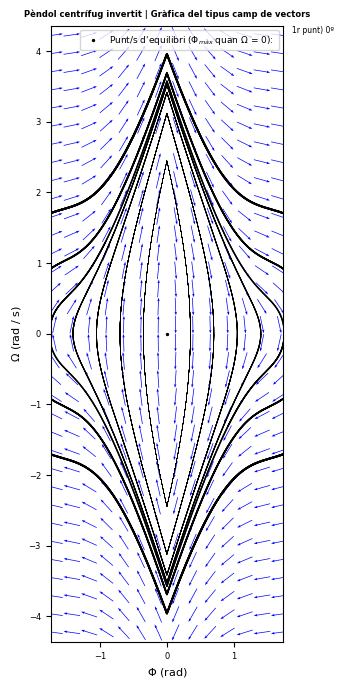

In [ ]:
from textwrap import wrap
from numpy import sin,cos,sign,sqrt,arcsin,pi, radians
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
from termcolor import colored
from matplotlib.pyplot import figure
import sympy as smp
from matplotlib.pyplot import cm
import numpy as np

plt.style.use('default')
np.seterr(divide='ignore', invalid='ignore')
g = 9.807
height = float(input("Alçada de l'esquiador (m): "))
l = 0.56*height
R_sc = float(input("Radi dels esquís (m): "))
V = float(input("Velocitat de l'esquiador durant el trajecte (m/s): "))

def psiomega(t,y):
    dy=np.zeros([2])
    dy[0] = y[1]
    dy[1] = (g/l)*np.sin(y[0])-(V**2/(l*R_sc))*np.sign(y[0])

    return dy

final_time = float(input("Temps final o duració del trajecte (s): "))
time = np.linspace(0, final_time, 100000)
initial_Phi = float(input("Angle fins al que es vol analitzar/graficar (º): "))
y0 = [np.radians(initial_Phi), np.radians(0.0)]

curves = int(input("Nombre de curves/funcions (com més en posis, més precís serà, però per contra gastarà més RAM i trigarà més a processar-les): "))
values = np.linspace(np.radians(-initial_Phi), np.radians(initial_Phi), curves)
vcolors = plt.cm.autumn_r(np.linspace(0.1, 1, len(values)))
 
plt.figure(figsize=(3, 8))
Phi_eq_pos = np.arcsin(V**2/(g*R_sc))
Phi_eq_neg = -np.arcsin(V**2/(g*R_sc))

for v, col in zip(values, vcolors):
    res0 = [y_ini*v for y_ini in y0]
    res = solve_ivp(psiomega, (0,final_time), res0, method='RK45', t_eval=time, rtol=1e-12)
    t, psi, omega = res.t, res.y[0], res.y[1]
    plt.plot(psi.T, omega.T, lw= 0.9*v, color='k')

def vectorfield(P, t=0):
    return ([P[1], (g/l)*np.sin(P[0])-(V**2/(l*R_sc))*np.sign(P[0])])


x = np.linspace(np.radians(-initial_Phi-200), np.radians(initial_Phi+200), 40)
y = np.linspace(-5, 5, 40)
X, Y = np.meshgrid(x, y)
DX, DY = vectorfield([X, Y])

if (V**2/(g*R_sc))<=1:
  M = (2*np.hypot(DX, DY))
else:
  M = (np.hypot(DX, DY))

Q = plt.quiver(X, Y, 2.5*DX/M, 2.5*DY/M, angles='xy', scale_units='xy', scale= 10, width=0.003, headwidth= 3.5, pivot='mid', color='b')

if (V**2/(g*R_sc))<=1:
  text_lim = "2n i 3r punts) ±"+str(round(np.degrees(Phi_eq_pos),2))+"º o ±"+str(round(Phi_eq_pos,3))+" rad."
else:
  text_lim = ""

plt.scatter(0,0,2, color="black", label="Punt/s d'equilibri (${\Phi}_{màx}$ quan ${\Omega}$ = 0): ")
plt.scatter(Phi_eq_pos,0,2, color="black")
plt.scatter(Phi_eq_neg,0,2, color="black")

if (V**2/(g*R_sc))<=1:
  plt.text(np.radians(initial_Phi)+0.3, max(omega)+1.4, "1r punt) 0º", fontsize=5.5, wrap=True)
else:
  plt.text(np.radians(initial_Phi)+0.3, max(omega)+0.3, "1r punt) 0º", fontsize=5.5, wrap=True)

plt.text(np.radians(initial_Phi)+0.3, max(omega)+1.2, text_lim, fontsize=5.5, wrap=True)
plt.title('Pèndol centrífug invertit | Gràfica del tipus camp de vectors', fontweight="bold", fontsize=6)
plt.xlabel(u'${\Phi}$ (rad)', fontsize=8)
plt.ylabel(u'${\Omega}$ (rad / s)', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)

if (V**2/(g*R_sc))<=1:
  plt.axis("image")
else:
  plt.axis("auto")

plt.legend(loc='upper right',fontsize=6.5, frameon=True)
plt.grid(False)

if (V**2/(g*R_sc))<=1:
  plt.ylim(min(omega)-1.5, max(omega)+1.5)
else:
  plt.ylim(min(omega)-0.4, max(omega)+0.4)

if (V**2/(g*R_sc))<=1:
  plt.xlim(np.radians(-initial_Phi)-0.1, np.radians(initial_Phi)+0.1)
else:
  plt.xlim(np.radians(-100), np.radians(100))

if (V**2/(g*R_sc))<=1:
  plt.gca().axes.xaxis.set_ticks([np.radians(-initial_Phi),Phi_eq_neg,0, Phi_eq_pos, np.radians(initial_Phi)])
  xticks = plt.gca().xaxis.get_major_ticks()
  xticks[1].label1.set_visible(False)
  xticks[3].label1.set_visible(False)
  plt.show()
else:
  plt.show()

#**Camp de vectors del pèndol centrífug invertit amb flexió i extensió de cames**

Aquest camp de vectors ens relaciona l'angle amb la velocitat angular. Per a $\zeta$ ≤ 1, s'observen tres punts d'equilibri; per a $\zeta$ > 1, en canvi, només un, que també apareix en el cas anterior (posició vertical; 0º). Cal remarcar que els vectors indiquen el sentit en què cada funció es desenvolupa durant el temps que s'ha determinat.

Variables que et demanarà:


*   **Alçada de l'esquiador (m) per calcular la posició aproximada del CM (centre de massa)**
*   **Radi dels esquís (m)**
*   **Velocitat de l'esquiador durant el trajecte (m/s)(constant)**
*   **Temps final o durada del trajecte (s)**
*   **Angle fins a què es vol graficar (º):** 

Hi ha **dos** casos:

- Quan l'esquiador/el pèndol té 3 posicions d'equilibri. Dues de simètriques (t'ho indica abans que intodueixis l'angle) i una de vertical (0º). Òbviament, si aquest límit és sobrepassat l'esquiador perd l'equilibi i cau (en el cas del pèndol actua estranyament). Per això, diem que l'inclinació del pèndol/de l'esquiador no pot passar del límit o angle màxim (99% de l'angle d'equilibri).

- Quan l'esquiador/el pèndol té una posició d'equilibri que és la vertical (0º) i, a més a més, si tries qualsevol angle, mentre sigui realista o no sigui extrem, pot estar oscil·lant constantment sense quedar-se en cap posició d'equilibri.

**(*) Posició d'equilibri significa la posició de l'esquiador en què $\Omega=0$.**

*   **Percentatge de flexió i extensió de les cames ($\eta$):** quan l'esquiador està en posició vertical les cames estan flexionades, per altra banda, si està al extrem de la curva la cama exterior està extesa (l'altra és paral·lela a l'exterior i, per tant, sempre està flexionada, vertical o no vertical). Generalment, com més petit és el percentatge, menys es nota la flexió i extensió de cames, i, a l'inrevés, com més s'aproxima al 100% més es nota la flexió i extensió de cames.

* **Nombre de contorns integrals o curves** 


---
Normes per al correcte funcionament del simulador:

-Nombres decimals amb '  .  ' , no amb '  ,  '  .

**Correcte :** 12.7

**Incorrecte :** 12,7


---
Per iniciar la simulació cliqueu el botó de "play" al racó superior esquerre del codi o bé feu la combinació de botons 

```
Ctrl+Enter
```

Alçada de l'esquiador (m): 1.8
Radi dels esquís (m): 14
Velocitat de l'esquiador durant el trajecte (m/s): 12
Percentatge de flexió i extensió de les cames (0-100%): 80
Temps final o duració del trajecte (s): 10
Angle fins al que es vol analitzar/graficar (º): 90
Nombre de curves/funcions (com més en posis, més precís serà, però per contra gastarà més RAM i trigarà més a processar-les): 15


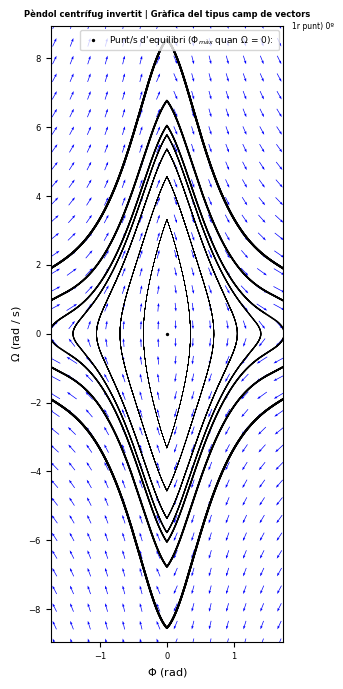

In [ ]:

from textwrap import wrap
from numpy import sin,cos,sign,sqrt,arcsin,pi, radians
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
from termcolor import colored
from matplotlib.pyplot import figure
import sympy as smp
from matplotlib.pyplot import cm
import numpy as np

plt.style.use('default')
np.seterr(divide='ignore', invalid='ignore')
g = 9.807
height = float(input("Alçada de l'esquiador (m): "))
l_o = 0.56*height
R_sc = float(input("Radi dels esquís (m): "))
V = float(input("Velocitat de l'esquiador durant el trajecte (m/s): "))
P = float(input("Percentatge de flexió i extensió de les cames (0-100%): "))
b = P/100

def psiomega(t,y):
    dy=np.zeros([2])
    dy[0] = y[1]
    dy[1] = (g/(l_o*(1-b*np.cos(y[0]))**(1./3)))*np.sin(y[0])-((V**2)/(R_sc*l_o*(1-b*np.cos(y[0]))**(1./3)))*np.sign(y[0]) - (2 * b * (y[1])**2 * np.sin(y[0]))/(3-3 * b * np.cos(y[0]))

    return dy

final_time = float(input("Temps final o duració del trajecte (s): "))
time = np.linspace(0, final_time, 100000)
initial_Phi = float(input("Angle fins al que es vol analitzar/graficar (º): "))
y0 = [np.radians(initial_Phi), np.radians(0.0)]

curves = int(input("Nombre de curves/funcions (com més en posis, més precís serà, però per contra gastarà més RAM i trigarà més a processar-les): "))
values = np.linspace(np.radians(-initial_Phi), np.radians(initial_Phi), curves)
vcolors = plt.cm.autumn_r(np.linspace(0.1, 1, len(values)))

plt.figure(figsize=(3, 8))
Phi_eq_pos = np.arcsin(V**2/(g*R_sc))
Phi_eq_neg = -np.arcsin(V**2/(g*R_sc))

for v, col in zip(values, vcolors):
    res0 = [y_ini*v for y_ini in y0]
    res = solve_ivp(psiomega, (0,final_time), res0, method='RK45', t_eval=time, rtol=1e-12)
    t, psi, omega = res.t, res.y[0], res.y[1]
    plt.plot(psi.T, omega.T, lw= 0.9*v, color='k')

def vectorfield(P, t=0):
    return ([P[1], (g/(l_o*(1-b*np.cos(P[0]))**(1./3)))*np.sin(P[0])-((V**2)/(R_sc*l_o*(1-b*np.cos(P[0]))**(1./3)))*np.sign(P[0]) - (2 * b * (P[1])**2 * np.sin(P[0]))/(3-3 * b * np.cos(P[0]))])


x = np.linspace(np.radians(-initial_Phi-200), np.radians(initial_Phi+200), 40)

if (V**2/(g*R_sc))<=1:
  y = np.linspace(-10, 10, 100)
else:
  y = np.linspace(-10, 10, 40)

X, Y = np.meshgrid(x, y)
DX, DY = vectorfield([X, Y])

if (V**2/(g*R_sc))<=1:
  M = (2*np.hypot(DX, DY))
else:
  M = (np.hypot(DX, DY))

Q = plt.quiver(X, Y, 2.5*DX/M, 2.5*DY/M, angles='xy', scale_units='xy', scale= 10, width=0.003, headwidth= 3.5, pivot='mid', color='b')

if (V**2/(g*R_sc))<=1:
  text_lim = "2n i 3r punts) ±"+str(round(np.degrees(Phi_eq_pos),2))+"º o ±"+str(round(Phi_eq_pos,3))+" rad."
else:
  text_lim = ""

plt.scatter(0,0,2, color="black", label="Punt/s d'equilibri (${\Phi}_{màx}$ quan ${\Omega}$ = 0): ")
plt.scatter(Phi_eq_pos,0,2, color="black")
plt.scatter(Phi_eq_neg,0,2, color="black")

if (V**2/(g*R_sc))<=1:
  plt.text(np.radians(initial_Phi)+0.3, max(omega)+1.4, "1r punt) 0º", fontsize=5.5, wrap=True)
else:
  plt.text(np.radians(initial_Phi)+0.3, max(omega)+0.3, "1r punt) 0º", fontsize=5.5, wrap=True)

plt.text(np.radians(initial_Phi)+0.3, max(omega)+1.2, text_lim, fontsize=5.5, wrap=True)
plt.title('Pèndol centrífug invertit | Gràfica del tipus camp de vectors', fontweight="bold", fontsize=6)
plt.xlabel(u'${\Phi}$ (rad)', fontsize=8)
plt.ylabel(u'${\Omega}$ (rad / s)', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)

if (V**2/(g*R_sc))<=1:
  plt.axis("image")
else:
  plt.axis("auto")

plt.legend(loc='upper right',fontsize=6.5, frameon=True)
plt.grid(False)

if (V**2/(g*R_sc))<=1:
  plt.ylim(-omega.max()-1.5, omega.max()+1.5)
else:
  plt.ylim(-omega.max()-0.4, omega.max()+0.4)

if (V**2/(g*R_sc))<=1:
  plt.xlim(np.radians(-initial_Phi)-0.1, np.radians(initial_Phi)+0.1)
else:
  plt.xlim(np.radians(-100), np.radians(100))

if (V**2/(g*R_sc))<=1:
  plt.gca().axes.xaxis.set_ticks([np.radians(-initial_Phi),Phi_eq_neg,0, Phi_eq_pos, np.radians(initial_Phi)])
  xticks = plt.gca().xaxis.get_major_ticks()
  xticks[1].label1.set_visible(False)
  xticks[3].label1.set_visible(False)
  plt.show()
else:
  plt.show()

#**Camp de vectors del pèndol centrífug invertit amb angulació**

Aquest camp de vectors ens relaciona l'angle amb la velocitat angular. Per a $\zeta$ ≤ 1, s'observen tres punts d'equilibri; per a $\zeta$ > 1, en canvi, només un, que també apareix en el cas anterior (posició vertical; 0º). Cal remarcar que els vectors indiquen el sentit en què cada funció es desenvolupa durant el temps que s'ha determinat.

Variables que et demanarà:


*   **Alçada de l'esquiador (m) per calcular la posició aproximada del CM (centre de massa)**
*   **Radi dels esquís (m)**
*   **Velocitat de l'esquiador durant el trajecte (m/s)(constant)**
*   **Temps final o durada del trajecte (s)**
*   **Angle fins a què es vol graficar (º):** 

Hi ha **dos** casos:

- Quan l'esquiador/el pèndol té 3 posicions d'equilibri. Dues de simètriques (t'ho indica abans que intodueixis l'angle) i una de vertical (0º). Òbviament, si aquest límit és sobrepassat l'esquiador perd l'equilibi i cau (en el cas del pèndol actua estranyament). Per això, diem que l'inclinació del pèndol/de l'esquiador no pot passar del límit o angle màxim (99% de l'angle d'equilibri).

- Quan l'esquiador/el pèndol té una posició d'equilibri que és la vertical (0º) i, a més a més, si tries qualsevol angle, mentre sigui realista o no sigui extrem, pot estar oscil·lant constantment sense quedar-se en cap posició d'equilibri.

**(*) Posició d'equilibri significa la posició de l'esquiador en què $\Omega=0$.**

* **Percentatge d'angulació ($\xi$):** l'angle de l'esquí sempre serà més gran que la de l'esquiador. Està comprès entre 0-100%. A 100% no hi ha angulació, atès que és com si multipliquessis per 1.

* **Nombre de contorns integrals o curves** 


---
Normes per al correcte funcionament del simulador:

-Nombres decimals amb '  .  ' , no amb '  ,  '  .

**Correcte :** 12.7

**Incorrecte :** 12,7


---
Per iniciar la simulació cliqueu el botó de "play" al racó superior esquerre del codi o bé feu la combinació de botons 

```
Ctrl+Enter
```

Alçada de l'esquiador (m): 1.8
Radi dels esquís (m): 14
Velocitat de l'esquiador durant el trajecte (m/s): 12
Percentatge d'angulació: 75
Temps final o duració del trajecte (s): 10
Angle fins al que es vol analitzar/graficar (º): 90
Nombre de curves/funcions (com més en posis, més precís serà, però per contra gastarà més RAM i trigarà més a processar-les): 15


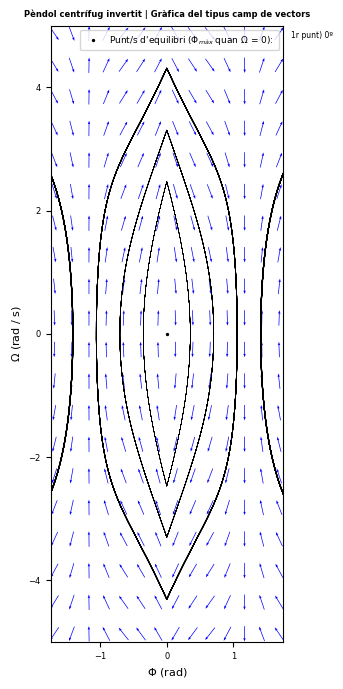

In [ ]:
from textwrap import wrap
from numpy import sin,cos,sign,sqrt,arcsin,pi, radians
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
from termcolor import colored
from matplotlib.pyplot import figure
import sympy as smp
from matplotlib.pyplot import cm
import numpy as np
from scipy.optimize import fsolve

class RootFinder:
    def __init__(self, start, stop, step=0.01, root_dtype="float64", xtol=1e-9):

        self.start = start
        self.stop = stop
        self.step = step
        self.xtol = xtol
        self.roots = np.array([], dtype=root_dtype)

    def add_to_roots(self, x):

        if (x < self.start) or (x > self.stop):
            return  # outside range
        if any(abs(self.roots - x) < self.xtol):
            return  # root already found.

        self.roots = np.append(self.roots, x)

    def find(self, f, *args):
        current = self.start

        for x0 in np.arange(self.start, self.stop + self.step, self.step):
            if x0 < current:
                continue
            x = self.find_root1(f, x0, *args)
            if x is None:  # no root found.
                continue
            current = x
            self.add_to_roots(x)

        return self.roots

    def find_root1(self, f, x0, *args):

        x, _, ier, _ = fsolve(f, x0=x0, args=args, full_output=True, xtol=self.xtol)
        if ier == 1:
            return x[0]
        return None

plt.style.use('default')
np.seterr(divide='ignore', invalid='ignore')
g = 9.807
height = float(input("Alçada de l'esquiador (m): "))
l = 0.56*height
R_sc = float(input("Radi dels esquís (m): "))
V = float(input("Velocitat de l'esquiador durant el trajecte (m/s): "))
P = float(input("Percentatge d'angulació: "))
A = P/100
zeta = V**2/(g*R_sc)

def f(x):
  return np.sin(x)-zeta*(np.cos(x)/np.cos(x/A))

r = RootFinder(0, np.pi/2, 0.0001)
phi_eq = r.find(f)


def psiomega(t,y):
    dy=np.zeros([2])
    dy[0] = y[1]
    dy[1] = (g/l)*np.sin(y[0])-(V**2 * np.cos(y[0]) * np.sign(y[0]/A))/(l*R_sc*np.cos(y[0]/A))

    return dy

final_time = float(input("Temps final o duració del trajecte (s): "))
time = np.linspace(0, final_time, 100000)
initial_Phi = float(input("Angle fins al que es vol analitzar/graficar (º): "))
y0 = [np.radians(initial_Phi), np.radians(0.0)]

curves = int(input("Nombre de curves/funcions (com més en posis, més precís serà, però per contra gastarà més RAM i trigarà més a processar-les): "))
values = np.linspace(np.radians(-initial_Phi), np.radians(initial_Phi), curves)
vcolors = plt.cm.autumn_r(np.linspace(0.1, 1, len(values)))

plt.figure(figsize=(3, 8))

if phi_eq.size>0:
  Phi_eq_pos = phi_eq[0]
  Phi_eq_neg = -phi_eq[0]
else:
  Phi_eq_pos = 0
  Phi_eq_neg = 0

for v, col in zip(values, vcolors):
    res0 = [y_ini*v for y_ini in y0]
    res = solve_ivp(psiomega, (0,final_time), res0, method='RK45', t_eval=time, rtol=1e-12)
    t, phi, omega = res.t, res.y[0], res.y[1]
    plt.plot(phi.T, omega.T, lw= 0.9*v, color='k')

def vectorfield(P, t=0):
    return ([P[1],(g/l)*np.sin(P[0])-(V**2 * np.cos(P[0]) * np.sign(P[0]/A))/(l*R_sc*np.cos(P[0]/A))])


x = np.linspace(np.radians(-initial_Phi-200), np.radians(initial_Phi+200), 40)

if phi_eq.size>0:
  y = np.linspace(-10, 10, 100)
else:
  y = np.linspace(-10, 10, 40)

X, Y = np.meshgrid(x, y)
DX, DY = vectorfield([X, Y])

if phi_eq.size>0:
  M = (2*np.hypot(DX, DY))
else:
  M = (np.hypot(DX, DY))

Q = plt.quiver(X, Y, 2.5*DX/M, 2.5*DY/M, angles='xy', scale_units='xy', scale= 10, width=0.003, headwidth= 3.5, pivot='mid', color='b')

if phi_eq.size>0:
  text_lim = "2n i 3r punts) ±"+str(round(np.degrees(Phi_eq_pos),2))+"º o ±"+str(round(Phi_eq_pos,3))+" rad."
else:
  text_lim = ""

plt.scatter(0,0,2, color="black", label="Punt/s d'equilibri (${\Phi}_{màx}$ quan ${\Omega}$ = 0): ")

if phi_eq.size>0:
  plt.scatter(Phi_eq_pos,0,2, color="black")
  plt.scatter(Phi_eq_neg,0,2, color="black")

if phi_eq.size>0:
  plt.text(np.radians(initial_Phi)+0.3, 2.8, "1r punt) 0º", fontsize=5.5, wrap=True)
else:
  plt.text(np.radians(initial_Phi)+0.3, 4.8, "1r punt) 0º", fontsize=5.5, wrap=True)

plt.text(np.radians(initial_Phi)+0.3, 2.6, text_lim, fontsize=5.5, wrap=True)
plt.title('Pèndol centrífug invertit | Gràfica del tipus camp de vectors', fontweight="bold", fontsize=6)
plt.xlabel(u'${\Phi}$ (rad)', fontsize=8)
plt.ylabel(u'${\Omega}$ (rad / s)', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)

if phi_eq.size>0:
  plt.axis("image")
else:
  plt.axis("auto")

plt.legend(loc='upper right',fontsize=6.5, frameon=True)
plt.grid(False)

if phi_eq.size>0:
  plt.ylim(-3, 3)
else:
  plt.ylim(-5, 5)

if phi_eq.size>0:
  plt.xlim(np.radians(-initial_Phi)-0.1, np.radians(initial_Phi)+0.1)
else:
  plt.xlim(np.radians(-100), np.radians(100))

if phi_eq.size>0:
  plt.gca().axes.xaxis.set_ticks([np.radians(-initial_Phi),Phi_eq_neg,0, Phi_eq_pos, np.radians(initial_Phi)])
  xticks = plt.gca().xaxis.get_major_ticks()
  xticks[1].label1.set_visible(False)
  xticks[3].label1.set_visible(False)
  plt.show()
else:
  plt.show()

#**Camp de vectors del pèndol centrífug invertit amb angulació, flexió i extensió de cames afegits**

Aquest camp de vectors ens relaciona l'angle amb la velocitat angular. Per a $\zeta$ ≤ 1, s'observen tres punts d'equilibri; per a $\zeta$ > 1, en canvi, només un, que també apareix en el cas anterior (posició vertical; 0º). Cal remarcar que els vectors indiquen el sentit en què cada funció es desenvolupa durant el temps que s'ha determinat.

Variables que et demanarà:


*   **Alçada de l'esquiador (m) per calcular la posició aproximada del CM (centre de massa)**
*   **Radi dels esquís (m)**
*   **Velocitat de l'esquiador durant el trajecte (m/s)(constant)**
*   **Temps final o durada del trajecte (s)**
*   **Angle fins a què es vol graficar (º):** 

Hi ha **dos** casos:

- Quan l'esquiador/el pèndol té 3 posicions d'equilibri. Dues de simètriques (t'ho indica abans que intodueixis l'angle) i una de vertical (0º). Òbviament, si aquest límit és sobrepassat l'esquiador perd l'equilibi i cau (en el cas del pèndol actua estranyament). Per això, diem que l'inclinació del pèndol/de l'esquiador no pot passar del límit o angle màxim (99% de l'angle d'equilibri).

- Quan l'esquiador/el pèndol té una posició d'equilibri que és la vertical (0º) i, a més a més, si tries qualsevol angle, mentre sigui realista o no sigui extrem, pot estar oscil·lant constantment sense quedar-se en cap posició d'equilibri.

**(*) Posició d'equilibri significa la posició de l'esquiador en què $\Omega=0$.**

*   **Percentatge de flexió i extensió de les cames ($\eta$):** quan l'esquiador està en posició vertical les cames estan flexionades, per altra banda, si està al extrem de la curva la cama exterior està extesa (l'altra és paral·lela a l'exterior i, per tant, sempre està flexionada, vertical o no vertical). Generalment, com més petit és el percentatge, menys es nota la flexió i extensió de cames, i, a l'inrevés, com més s'aproxima al 100% més es nota la flexió i extensió de cames.

* **Percentatge d'angulació ($\xi$):** l'angle de l'esquí sempre serà més gran que la de l'esquiador. Està comprès entre 0-100%. A 100% no hi ha angulació, atès que és com si multipliquessis per 1.

* **Nombre de contorns integrals o curves** 


---
Normes per al correcte funcionament del simulador:

-Nombres decimals amb '  .  ' , no amb '  ,  '  .

**Correcte :** 12.7

**Incorrecte :** 12,7


---
Per iniciar la simulació cliqueu el botó de "play" al racó superior esquerre del codi o bé feu la combinació de botons 

```
Ctrl+Enter
```

Alçada de l'esquiador (m): 1.8
Radi dels esquís (m): 14
Velocitat de l'esquiador durant el trajecte (m/s): 12
Percentatge de flexió i extensió de les cames (0-100%): 80
Percentatge d'angulació: 75
Temps final o duració del trajecte (s): 10
Angle fins al que es vol analitzar/graficar (º): 90
Nombre de curves/funcions (com més en posis, més precís serà, però per contra gastarà més RAM i trigarà més a processar-les): 15


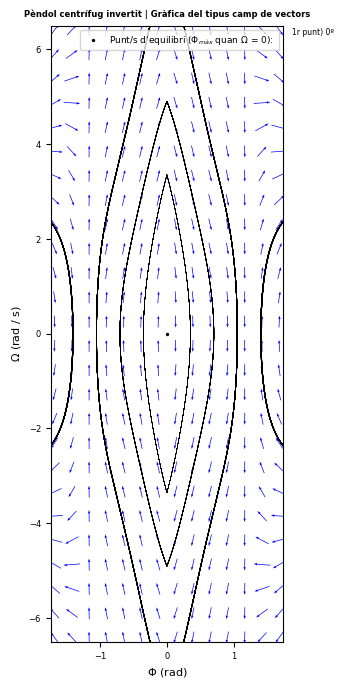

In [ ]:
from textwrap import wrap
from numpy import sin,cos,sign,sqrt,arcsin,pi, radians
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
from termcolor import colored
from matplotlib.pyplot import figure
import sympy as smp
from matplotlib.pyplot import cm
import numpy as np
from scipy.optimize import fsolve

class RootFinder:
    def __init__(self, start, stop, step=0.01, root_dtype="float64", xtol=1e-9):

        self.start = start
        self.stop = stop
        self.step = step
        self.xtol = xtol
        self.roots = np.array([], dtype=root_dtype)

    def add_to_roots(self, x):

        if (x < self.start) or (x > self.stop):
            return  # outside range
        if any(abs(self.roots - x) < self.xtol):
            return  # root already found.

        self.roots = np.append(self.roots, x)

    def find(self, f, *args):
        current = self.start

        for x0 in np.arange(self.start, self.stop + self.step, self.step):
            if x0 < current:
                continue
            x = self.find_root1(f, x0, *args)
            if x is None:  # no root found.
                continue
            current = x
            self.add_to_roots(x)

        return self.roots

    def find_root1(self, f, x0, *args):

        x, _, ier, _ = fsolve(f, x0=x0, args=args, full_output=True, xtol=self.xtol)
        if ier == 1:
            return x[0]
        return None

plt.style.use('default')
np.seterr(divide='ignore', invalid='ignore')
g = 9.807
height = float(input("Alçada de l'esquiador (m): "))
l_o = 0.56*height
R_sc = float(input("Radi dels esquís (m): "))
V = float(input("Velocitat de l'esquiador durant el trajecte (m/s): "))
P_1 = float(input("Percentatge de flexió i extensió de les cames (0-100%): "))
b = P_1/100
P_2 = float(input("Percentatge d'angulació: "))
A = P_2/100
zeta = V**2/(g*R_sc)

def f(x):
  return np.sin(x)-zeta*(np.cos(x)/np.cos(x/A))

r = RootFinder(0, np.pi/2, 0.0001)
phi_eq = r.find(f)


def psiomega(t,y):
    dy=np.zeros([2])
    dy[0] = y[1]
    dy[1] = (g/(l_o * (1-b * np.cos(y[0]))**(1./3)))*np.sin(y[0])-(V**2 * np.cos(y[0]) * np.sign(y[0]/A))/(l_o * (1-b * np.cos(y[0]))**(1./3) * R_sc * np.cos(y[0]/A)) - (2 * b * (y[1])**2 * np.sin(y[0]))/(3-3 * b * np.cos(y[0]))

    return dy

final_time = float(input("Temps final o duració del trajecte (s): "))
time = np.linspace(0, final_time, 100000)
initial_Phi = float(input("Angle fins al que es vol analitzar/graficar (º): "))
y0 = [np.radians(initial_Phi), np.radians(0.0)]

curves = int(input("Nombre de curves/funcions (com més en posis, més precís serà, però per contra gastarà més RAM i trigarà més a processar-les): "))
values = np.linspace(np.radians(-initial_Phi), np.radians(initial_Phi), curves)
vcolors = plt.cm.autumn_r(np.linspace(0.1, 1, len(values)))

plt.figure(figsize=(3, 8))

if phi_eq.size>0:
  Phi_eq_pos = phi_eq[0]
  Phi_eq_neg = -phi_eq[0]
else:
  Phi_eq_pos = 0
  Phi_eq_neg = 0

for v, col in zip(values, vcolors):
    res0 = [y_ini*v for y_ini in y0]
    res = solve_ivp(psiomega, (0,final_time), res0, method='RK45', t_eval=time, rtol=1e-12)
    t, phi, omega = res.t, res.y[0], res.y[1]
    plt.plot(phi.T, omega.T, lw= 0.9*v, color='k')

def vectorfield(P, t=0):
    return ([P[1],(g/(l_o * (1-b * np.cos(P[0]))**(1./3)))*np.sin(P[0])-(V**2 * np.cos(P[0]) * np.sign(P[0]/A))/(l_o * (1-b * np.cos(P[0]))**(1./3) * R_sc * np.cos(P[0]/A)) - (2 * b * (P[1])**2 * np.sin(P[0]))/(3-3 * b * np.cos(P[0]))])


x = np.linspace(np.radians(-initial_Phi-200), np.radians(initial_Phi+200), 40)

if phi_eq.size>0:
  y = np.linspace(-10, 10, 100)
else:
  y = np.linspace(-10, 10, 40)

X, Y = np.meshgrid(x, y)
DX, DY = vectorfield([X, Y])

if phi_eq.size>0:
  M = (2*np.hypot(DX, DY))
else:
  M = (np.hypot(DX, DY))

Q = plt.quiver(X, Y, 2.5*DX/M, 2.5*DY/M, angles='xy', scale_units='xy', scale= 10, width=0.003, headwidth= 3.5, pivot='mid', color='b')

if phi_eq.size>0:
  text_lim = "2n i 3r punts) ±"+str(round(np.degrees(Phi_eq_pos),2))+"º o ±"+str(round(Phi_eq_pos,3))+" rad."
else:
  text_lim = ""

plt.scatter(0,0,2, color="black", label="Punt/s d'equilibri (${\Phi}_{màx}$ quan ${\Omega}$ = 0): ")

if phi_eq.size>0:
  plt.scatter(Phi_eq_pos,0,2, color="black")
  plt.scatter(Phi_eq_neg,0,2, color="black")

if phi_eq.size>0:
  plt.text(np.radians(initial_Phi)+0.3, 3.8, "1r punt) 0º", fontsize=5.5, wrap=True)
else:
  plt.text(np.radians(initial_Phi)+0.3, 6.3, "1r punt) 0º", fontsize=5.5, wrap=True)

plt.text(np.radians(initial_Phi)+0.3, 3.6, text_lim, fontsize=5.5, wrap=True)
plt.title('Pèndol centrífug invertit | Gràfica del tipus camp de vectors', fontweight="bold", fontsize=6)
plt.xlabel(u'${\Phi}$ (rad)', fontsize=8)
plt.ylabel(u'${\Omega}$ (rad / s)', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)

if phi_eq.size>0:
  plt.axis("image")
else:
  plt.axis("auto")

plt.legend(loc='upper right',fontsize=6.5, frameon=True)
plt.grid(False)

if phi_eq.size>0:
  plt.ylim(-4, 4)
else:
  plt.ylim(-6.5, 6.5)

if phi_eq.size>0:
  plt.xlim(np.radians(-initial_Phi)-0.1, np.radians(initial_Phi)+0.1)
else:
  plt.xlim(np.radians(-100), np.radians(100))

if phi_eq.size>0:
  plt.gca().axes.xaxis.set_ticks([np.radians(-initial_Phi),Phi_eq_neg,0, Phi_eq_pos, np.radians(initial_Phi)])
  xticks = plt.gca().xaxis.get_major_ticks()
  xticks[1].label1.set_visible(False)
  xticks[3].label1.set_visible(False)
  plt.show()
else:
  plt.show()

#**Gràfica de la funció de flexió i extensió de cames i com afecta l'altura i longitud del centre de massa respecte del pivot/esquí exterior**



Variables que et demanarà:

*   **Alçada de l'esquiador (m):** per calcular la posició aproximada del CM (centre de massa)

*   **Percentatge de flexió i extensió de les cames ($\eta$):** quan l'esquiador està en posició vertical les cames estan flexionades, per altra banda, si està al extrem de la curva la cama exterior està extesa (l'altra és paral·lela a l'exterior i, per tant, sempre està flexionada, vertical o no vertical). Generalment, com més petit és el percentatge, menys es nota la flexió i extensió de cames, i, a l'inrevés, com més s'aproxima al 100% més es nota la flexió i extensió de cames.

La derivació de la funció s'ha donat de manera iterativa i arbitrària. S'ha intentat que una funció compleixi un requisits que descriuen la flexió i extensió de cames. En aquest cas els requisits són: que hi hagi el màxim grau de flexió en la posició vertical i el màxim grau d'extensió a l'angle dictat per la persona que prova el simulador, que en aquest cas és l'inicial.

Així doncs, quan l'esquiador/el pèndol s'aproxima a la posició vertical obtenim la següent forma de la funció:

\begin{align}
& \lim_{\Phi \rightarrow 0}\;\ell_o \sqrt[3]{1-\eta\cos\Phi} = \ell_o \sqrt[3]{1-\eta}.
\end{align}

En canvi, quan s'aproxima a la posició horitzontal (a mesura que augmentem l'angle) obtenim la següent forma de la funció: 

\begin{align}
& \lim_{\Phi \rightarrow \frac{\pi}{2}}\;\ell_o \sqrt[3]{1-\eta\cos\Phi} = \ell_o\sqrt[3]{1} = \ell_o,
\end{align}


on $\ell_o$ és la distància del pèndol o de l'esquí exterior al centre de massa originalment (sense cap flexió ni extensió) i $\eta$ és el percentatge tractat en aquesta secció.

És necessari subratllar que el fet que inclogui un cosinus i que treballi amb angles del 1r i 4t quadrant fa que la funció sigui simètrica, la longitud del fil és el mateix sigui angle positiu com negatiu. Aquest aspecte s'observa perfectament amb les gràfiques d'aquest simulador.

Per tant, la funció és adient a l'hora de descriure el fet mencionat anteriorment.

---
Normes per al correcte funcionament del simulador:

-Nombres decimals amb '  .  ' , no amb '  ,  '  .

**Correcte :** 12.7

**Incorrecte :** 12,7


---
Per iniciar la simulació cliqueu el botó de "play" al racó superior esquerre del codi o bé feu la combinació de tecles

```
Ctrl+Enter
```




Alçada de l'esquiador (m): 1.8
Percentatge de flexió i extensió de les cames (0-100%): 80


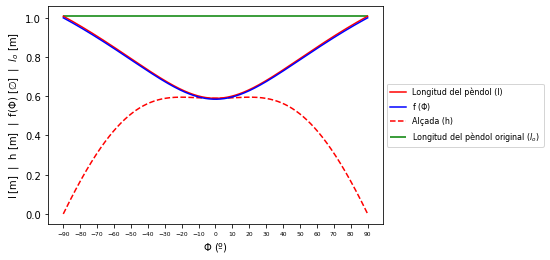

In [ ]:
import numpy as np
from numpy import sin,cos,sign,sqrt,arcsin,pi
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
from termcolor import colored
from matplotlib.pyplot import figure
import sympy as smp

g = 9.807
height = float(input("Alçada de l'esquiador (m): "))
l_o = 0.56*height

P = float(input("Percentatge de flexió i extensió de les cames (0-100%): "))
b = P/100

phi = np.linspace(-90, 90, 1000)

l_phi= l_o*(1-b*np.cos(np.radians(phi)))**(1./3)
h = l_phi*cos(np.radians(phi))

plt.plot(phi, l_phi, "r", zorder=2, label="Longitud del pèndol (l)")
plt.plot(phi, l_phi/l_o, "b", zorder=2, label = "f (${\Phi}$)")
plt.plot(phi, h, "r--", zorder=1, label= "Alçada (h)")
plt.hlines(l_o, -90, 90, colors = "green", zorder=1, label= "Longitud del pèndol original ($l_{o}$)")
plt.xlabel(u'${\Phi}$ (º)')
plt.ylabel('l [m]  |  h [m]  |  f(${\Phi}$) [∅]  |  $l_{o}$ [m]')
plt.xticks(np.arange(-90, 91, 10), fontsize=6)
plt.legend(loc='center left',fontsize=8, bbox_to_anchor=(1, 0.5))
plt.show()

#**Com afecta la flexió i extensió de cames a la força de reacció del terra**



Variables que et demanarà:

*   **Massa de l'esquiador (kg)**

*   **Percentatge de flexió i extensió de les cames ($\eta$):** quan l'esquiador està en posició vertical les cames estan flexionades, per altra banda, si està al extrem de la curva la cama exterior està extesa (l'altra és paral·lela a l'exterior i, per tant, sempre està flexionada, vertical o no vertical). Generalment, com més petit és el percentatge, menys es nota la flexió i extensió de cames, i, a l'inrevés, com més s'aproxima al 100% més es nota la flexió i extensió de cames.

*   **Angle inicial del pèndol/de l'esquiador (º):** 

Hi ha **dos** casos:

- Quan l'esquiador/el pèndol té 3 posicions d'equilibri. Dues de simètriques (t'ho indica abans que intodueixis l'angle) i una de vertical (0º). Òbviament, si aquest límit és sobrepassat l'esquiador perd l'equilibi i cau (en el cas del pèndol actua estranyament). Per això, diem que l'inclinació del pèndol/de l'esquiador no pot passar del límit o angle màxim (99% de l'angle d'equilibri).

- Quan l'esquiador/el pèndol té una posició d'equilibri que és la vertical (0º) i, a més a més, si tries qualsevol angle, mentre sigui realista o no sigui extrem, pot estar oscil·lant constantment sense quedar-se en cap posició d'equilibri.

**(*) Posició d'equilibri significa la posició de l'esquiador en què $\Omega=0$.**

*   **Radi dels esquís (m)**
*   **Velocitat de l'esquiador durant el trajecte (m/s)(constant)**

---
Normes per al correcte funcionament del simulador:

-Nombres decimals amb '  .  ' , no amb '  ,  '  .

**Correcte :** 12.7

**Incorrecte :** 12,7


---
Per iniciar la simulació cliqueu el botó de "play" al racó superior esquerre del codi o bé feu la combinació de tecles

```
Ctrl+Enter
```




Massa de l'esquiador (kg): 80
Percentatge de flexió i extensió de les cames (0-100%): 80
Radi dels esquís (m): 14
Velocitat de l'esquiador durant el trajecte (m/s): 12
Angle màxim o inicial fins al que es vol graficar (º) (l'esquiador no caurà): 70


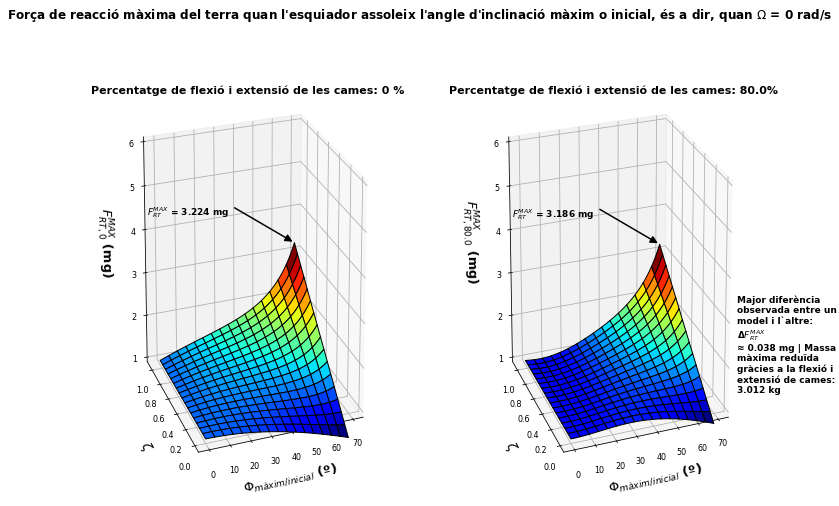

In [1]:
import numpy as np
from numpy import sin,cos,sign,sqrt,arcsin,pi
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import *
import matplotlib.gridspec as gridspec
import re


m = float(input("Massa de l'esquiador (kg): "))
P = float(input("Percentatge de flexió i extensió de les cames (0-100%): "))
b = P/100
R_sc = float(input("Radi dels esquís (m): "))
V = float(input("Velocitat de l'esquiador durant el trajecte (m/s): "))
zeta_lim = V**2/(9.807*R_sc)

if zeta_lim<=1:
  print("Com que u03B6≤1, l'angle màxim que es port assolir sense caure és "+str(round(np.arcsin(zeta_lim)*(180/np.pi), 2))+"º")
  max_Phi = np.arcsin(zeta_lim)*(180/np.pi)
else:
  max_Phi = float(input("Angle màxim o inicial fins al que es vol graficar (º) (l'esquiador no caurà): "))

x1 = np.linspace(0, max_Phi, 400)
y1 = np.linspace(0, zeta_lim, 400)
X1, Y1 = np.meshgrid(x1, y1)
Z1= Y1*np.tan(X1*np.pi/180) + np.cos(X1*np.pi/180)
Z2= Y1*np.tan(X1*np.pi/180) + np.cos(X1*np.pi/180) + ((b*np.sin(X1*np.pi/180))/(3-3*b*np.cos(X1*np.pi/180)))*(np.sin(X1*np.pi/180)-Y1)
g_force_max1 = y1[-1]*np.tan(x1[-1]*np.pi/180) + np.cos(x1[-1]*np.pi/180) + ((0*np.sin(x1[-1]*np.pi/180))/(3-3*0*np.cos(x1[-1]*np.pi/180)))*(np.sin(x1[-1]*np.pi/180)-y1[-1])
x_star, y_star = (Z2 == Z2.max()).nonzero()
x_maxima = int(x_star)
y_maxima = int(y_star)
z_maxima = Z2.max()

delta_F_RT_max = Z1.max() - Z2.max()
m_red = delta_F_RT_max*m


arrowprops = dict(mutation_scale=15,linewidth=1.5,arrowstyle='-|>',color='k')

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fletxa1 = Arrow3D([x1[-1]-(max_Phi)/3 +4,x1[-1]], [y1[-1]+0.55,y1[-1]], [g_force_max1+0.25,g_force_max1], **arrowprops)
fletxa2 = Arrow3D([x1[x_maxima]-(max_Phi)/3 +4,x1[x_maxima]], [y1[y_maxima]+0.55,y1[y_maxima]], [z_maxima+0.25,z_maxima], **arrowprops)


fig = plt.figure(figsize=(12,8))
fig.suptitle("Força de reacció màxima del terra quan l'esquiador assoleix l'angle d'inclinació màxim o inicial, és a dir, quan ${\Omega}$ = 0 rad/s", fontweight="bold")
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X1, Y1, Z1, rstride=25, cstride=25, cmap="jet", antialiased=True, edgecolor = 'black')
ax1.add_artist(fletxa1)
ax1.view_init(elev=20, azim=250)
ax1.grid(True)
ax1.text(x1[-1]-max_Phi+5,y1[-1]+0.55, g_force_max1+0.4, '$F^{MAX}_{RT}$ = %s mg' %round(g_force_max1,3), size=9, zorder=1, color='k', fontweight="bold") 
ax1.set_zlim3d(1, 6)
ax1.set_title('Percentatge de flexió i extensió de les cames: 0 %', fontsize=11, fontweight="bold")  
ax1.set_xlabel(r'${\Phi}_{màxim  /  inicial}$ (º)', fontsize=13, fontweight="bold")
ax1.set_ylabel(r'${\zeta}$', fontsize=13, fontweight="bold")
ax1.set_zlabel('$F^{MAX}_{RT,  0}$ (mg)', fontsize=13, fontweight="bold")
ax1.tick_params(axis='both', which='major', labelsize=8)
ax1.tick_params(axis='both', which='minor', labelsize=8)
ax1.yaxis.labelpad=10
ax1.zaxis.labelpad=18

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X1, Y1, Z2, rstride=25, cstride=25, cmap="jet", antialiased=True, edgecolor = 'black')
ax2.add_artist(fletxa2)
ax2.view_init(elev=20, azim=250)
ax2.grid(True)
ax2.text(x1[x_maxima]-max_Phi+5,y1[y_maxima]+0.55, z_maxima+0.4, '$F^{MAX}_{RT}$ = %s mg' %round(z_maxima,3), size=9, zorder=1, color='k', fontweight="bold") 
ax2.set_zlim3d(1, 6)
ax2.set_title('Percentatge de flexió i extensió de les cames: '+str(P)+'%', fontsize=11, fontweight="bold")
ax2.set_xlabel(r'${\Phi}_{màxim  /  inicial}$ (º)', fontsize=13, fontweight="bold")
ax2.set_ylabel(r'${\zeta}$', fontsize=13, fontweight="bold")
ax2.set_zlabel('$F^{MAX}_{RT,  %s}$ (mg)' %P, fontsize=13, fontweight="bold")
ax2.tick_params(axis='both', which='major', labelsize=8)
ax2.tick_params(axis='both', which='minor', labelsize=8)
ax2.yaxis.labelpad=10
ax2.zaxis.labelpad=18
t =("Major diferència observada entre un model i l`altre: Δ$F^{MAX}_{RT}$ ≈ "+str(round(delta_F_RT_max, 3))+" mg | Massa màxima reduïda gràcies a la flexió i extensió de cames: "+str(round(m_red,3))+" kg")
ax2.text(max_Phi+1,-0.35,2, t, fontsize=9, wrap=True, fontweight="bold")  

plt.show()